# ENCUESTA DE CURSADA
## Segundo Cuatrimestre de 2019
### Departamento de Computación FIUBA

In [1]:
import numpy as np 
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

In [2]:
comp = pd.read_csv('encuesta.csv')
comp.sample(1)

Marca temporal Email (opcional)                                 Curso  \
16  2/14/2020 23:21:21              NaN  75.01-95.01-Computación - 11 - Calvo   

   Opinión General Sobre el Curso ¿Aprobó la Cursada?  \
16                      Muy Bueno                  Sí   

   ¿Cómo te Resultaron los Temas de la Materia?  \
16                                 Interesantes   

   ¿Los Temas de la Materia Están Actualizados?  \
16                                           Sí   

   Nivel de las Clases Teóricas del Curso  \
16                                 Buenas   

   Nivel de las Clases Prácticas del Curso Dificultad del Curso  \
16                              Muy Buenas                Facil   

   Dificultad del TP Comentarios Sobre el Curso  \
16            Normal                        NaN   

   ¿El email puede ser mostrado al docente?  
16                                       No

#### Total de Encuestas Procesadas

In [3]:
print(len(comp))

666


In [4]:
# This not used :)
filter = (comp["Comentarios Sobre el Curso"].notnull())
opinions = comp.loc[filter,['Curso','Comentarios Sobre el Curso']].sort_values('Curso')

In [5]:
def map_answers(comp):
    map_sino = {'Sí':5,'No':1}
    map_opinion = {'Excelente':5,'Muy Bueno':4, 'Bueno':3,'Regular':2,'Malo':1}
    map_temas = {'Interesantes':4,'Muy Interesantes':5, 'Poco Interesantes':2,'Nada Interesantes':1}
    map_clases_teoricas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No hay clases teóricas':np.NaN}
    map_dificultad_tp = {'Muy dificil':5,'Dificil':4,'Normal':3,'Fácil':2,'Muy Fácil':1, 'No hay TP': np.NaN}
    map_dificultad = {'Muy Dificil':5,'Dificil':4,'Normal':3,'Facil':2,'Muy Facil':1, 'No hay TP': np.NaN}
    map_clases_practicas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No Hay Clases Prácticas':np.NaN}
    comp.replace({"¿Aprobó la Cursada?": map_sino},inplace=True)
    comp.replace({"¿Los Temas de la Materia Están Actualizados?": map_sino},inplace=True)
    comp.replace({"Opinión General Sobre el Curso": map_opinion},inplace=True)
    comp.replace({"Nivel de las Clases Teóricas del Curso": map_clases_teoricas},inplace=True)
    comp.replace({"Nivel de las Clases Prácticas del Curso": map_clases_practicas},inplace=True)
    comp.replace({"Dificultad del Curso": map_dificultad},inplace=True)
    comp.replace({"Dificultad del TP": map_dificultad_tp},inplace=True)
    comp.replace({"¿Cómo te Resultaron los Temas de la Materia?": map_temas},inplace=True)
    return comp

In [6]:
comp = map_answers(comp)

In [7]:
comp['Dificultad del Curso'] = comp['Dificultad del Curso'].astype('int')

In [8]:
comp.dtypes

Marca temporal                                   object
Email (opcional)                                 object
Curso                                            object
Opinión General Sobre el Curso                    int64
¿Aprobó la Cursada?                               int64
¿Cómo te Resultaron los Temas de la Materia?      int64
¿Los Temas de la Materia Están Actualizados?      int64
Nivel de las Clases Teóricas del Curso          float64
Nivel de las Clases Prácticas del Curso         float64
Dificultad del Curso                              int64
Dificultad del TP                               float64
Comentarios Sobre el Curso                       object
¿El email puede ser mostrado al docente?         object
dtype: object

## Histograma de calificaciones para la opinión general sobre el curso


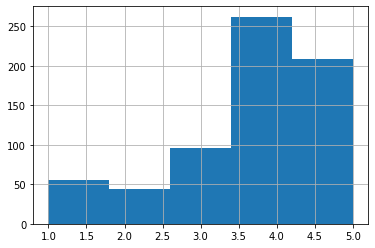

In [9]:
comp['Opinión General Sobre el Curso'].hist(bins=5);

In [10]:
grouped = comp.groupby('Curso')
num_votes = grouped.agg('size')
g_mean = grouped.mean()
g_mean['votes']=num_votes

## Varianza de la Opinión por Curso
Este gráfico muestra la variabilidad de la pregunta "Opinión General Sobre el Curso", a menor valor mas consistentes los resultados de la encuesta. Los valores mayores muestran disparidad de resultados en cuanto a la opinión general sobre el curso.

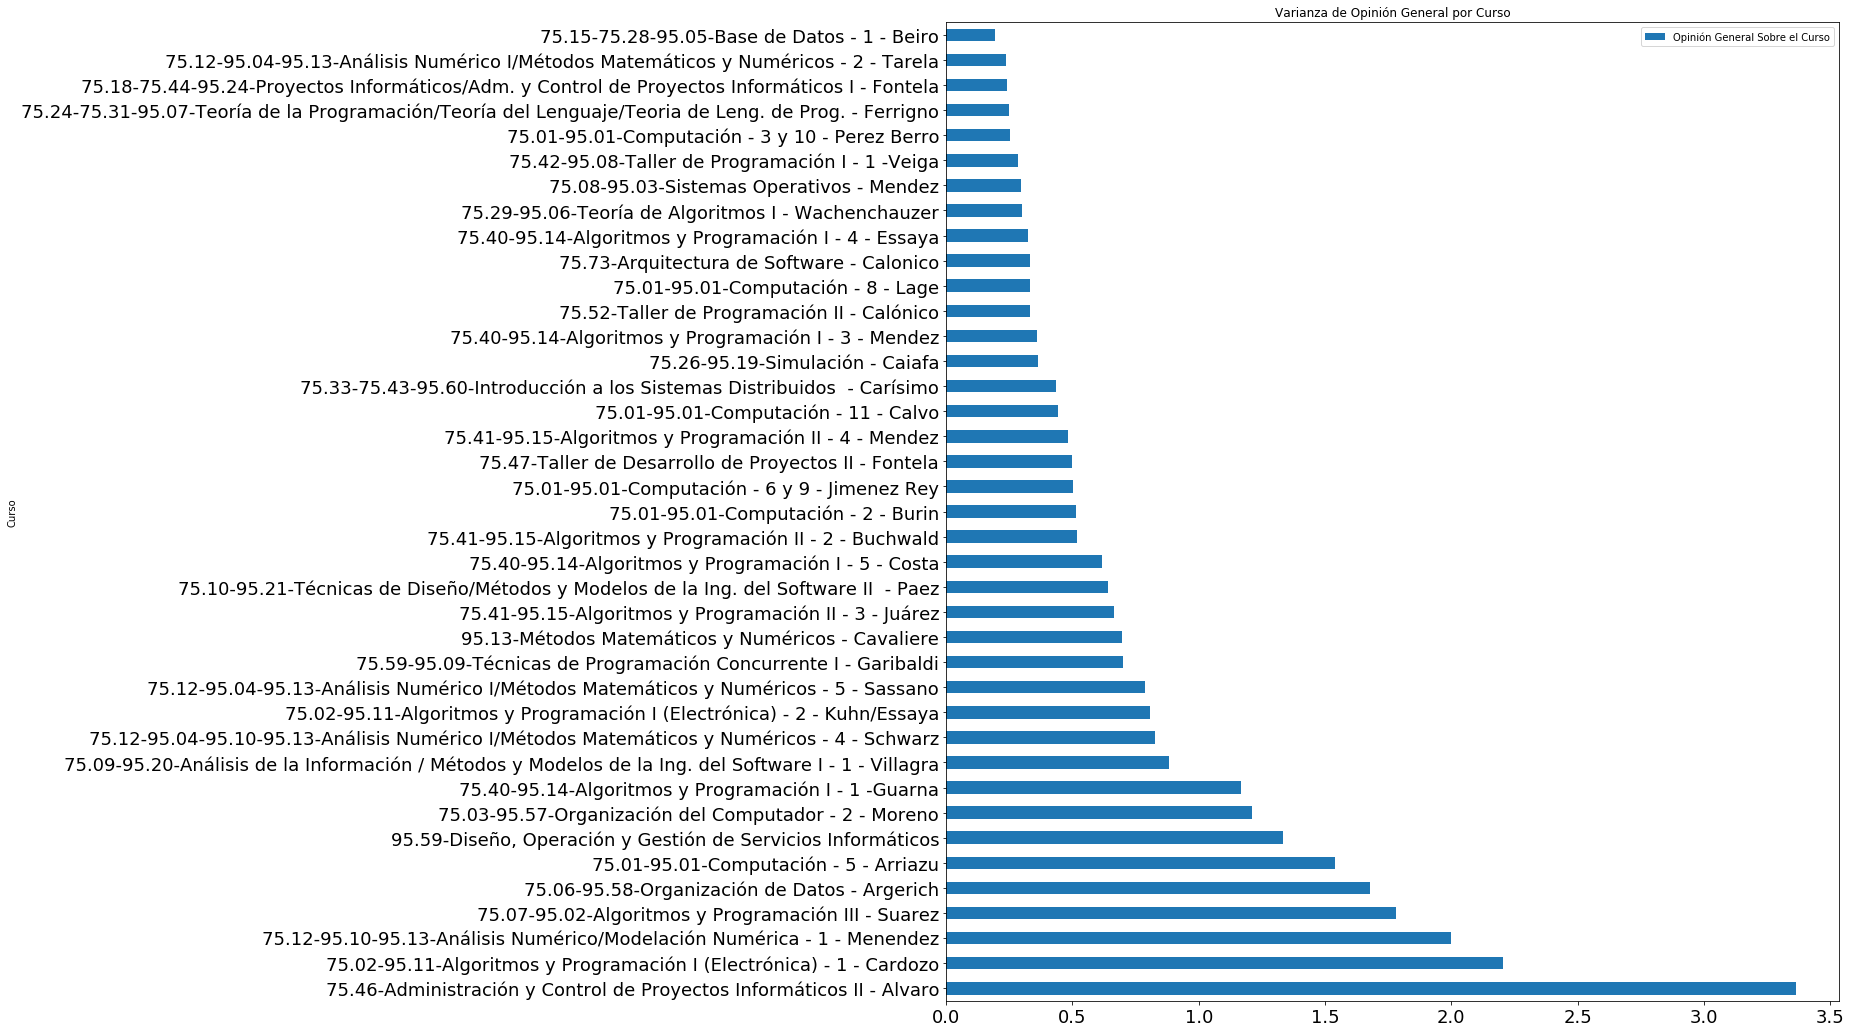

In [11]:
g_var = grouped.var()
gop = g_var.loc[g_var['Opinión General Sobre el Curso']>0,['Opinión General Sobre el Curso']].\
    sort_values(by='Opinión General Sobre el Curso',ascending=False).\
    plot(kind='barh',figsize=(16,18),title='Varianza de Opinión General por Curso',fontsize=18);

## Cantidad de Encuestados por Curso
Cantidad de encuestas completadas por cada Curso.

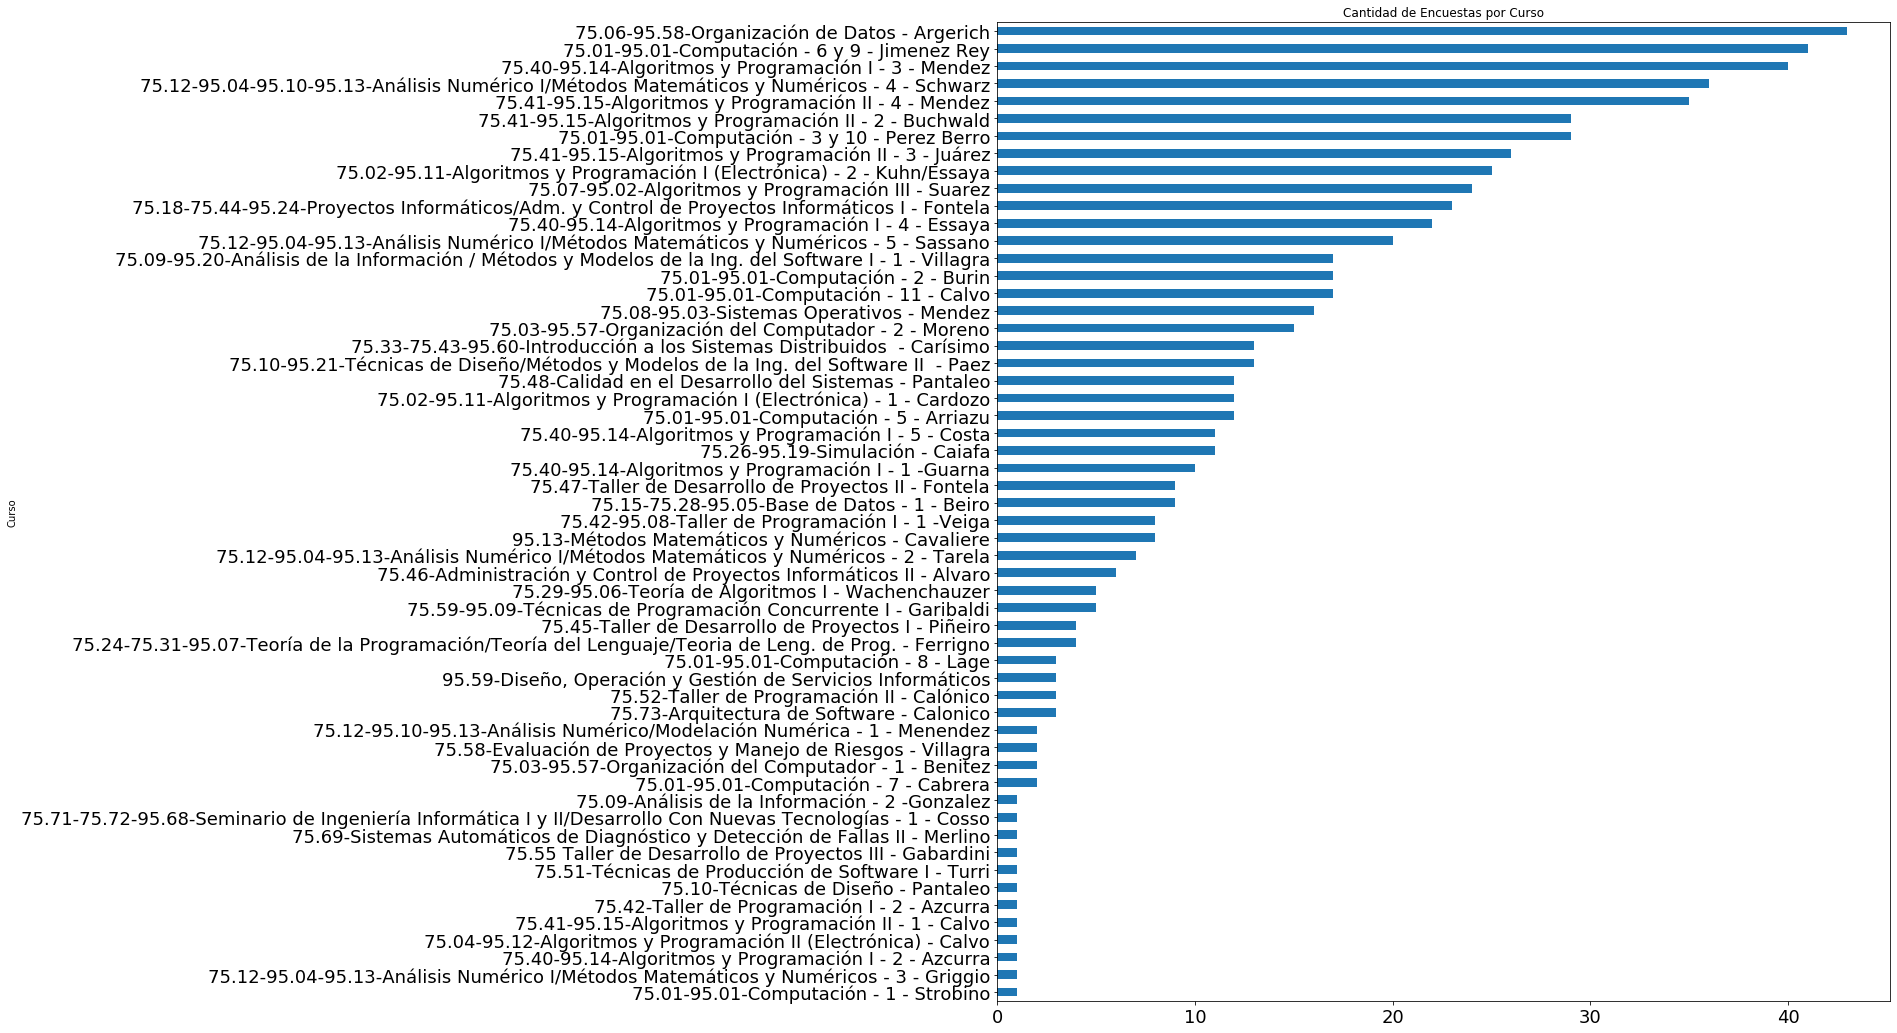

In [12]:
g_mean['votes'].sort_values(ascending=True).plot(kind='barh',figsize=(16,18),title='Cantidad de Encuestas por Curso',fontsize=18);

In [13]:
# Quedarnos unicamente con los cursos que tienen 3 o mas encuestas
g_mean = g_mean.loc[g_mean['votes']>2,:]
lista_cursos = g_mean.index.tolist()

## Heatmap de Evaluación de Cursos (5 o mas respuestas)
Esta matriz muestra el promedio de calificaciones para cada pregunta de la encuesta para los cursos que tienen 5 o mas encuestas. Orden alfabético por curso.

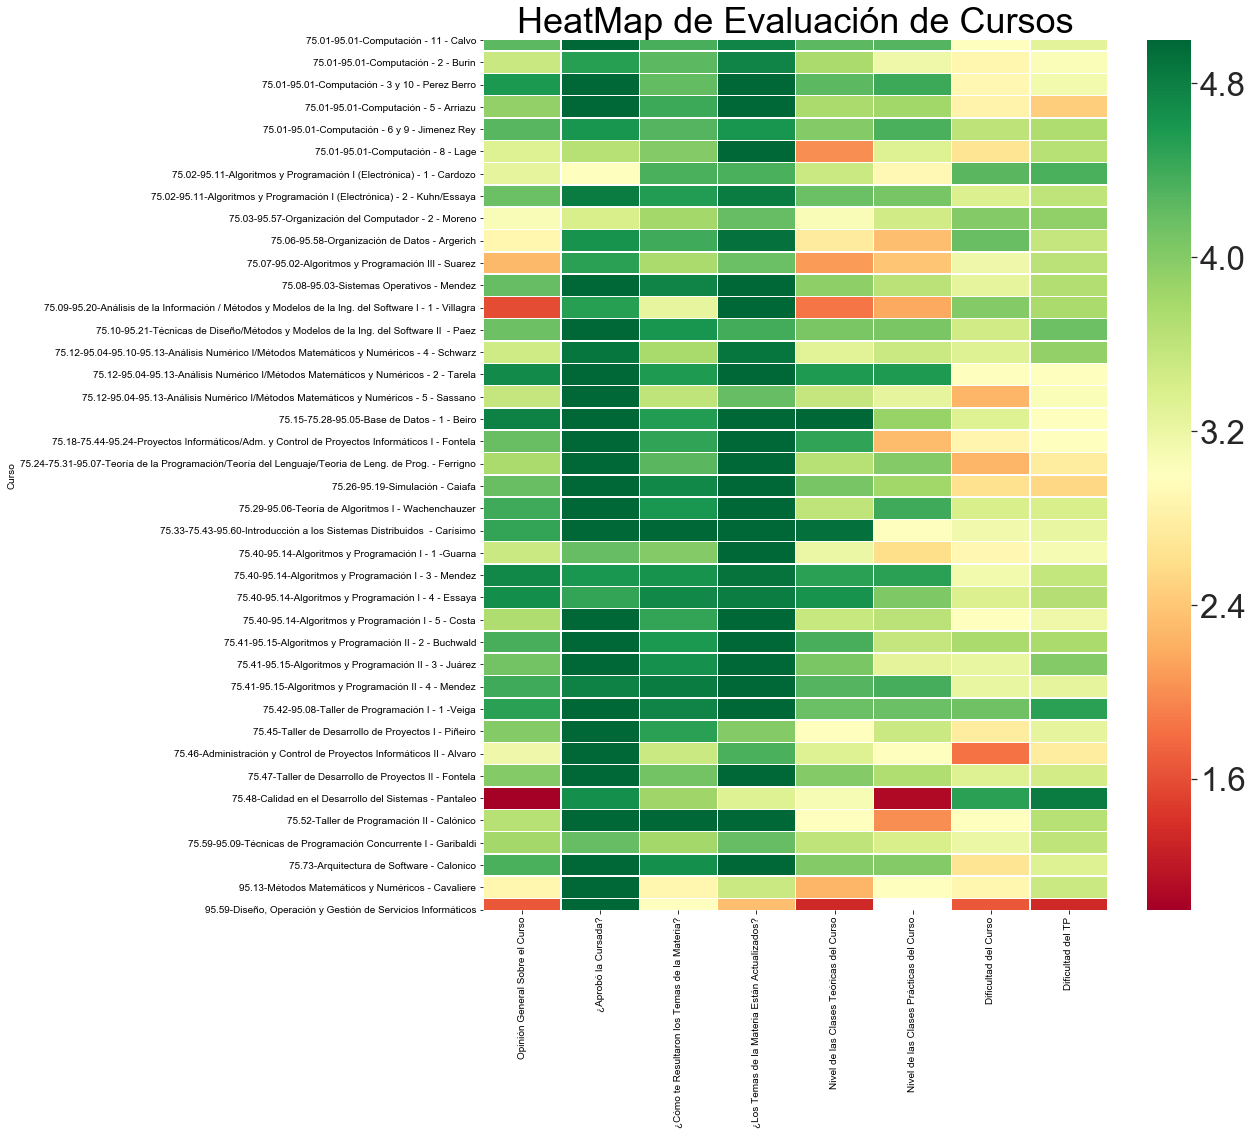

In [14]:
g_mean2 = g_mean.drop('votes',1)
fig, ax = plt.subplots(figsize=(14,16))        
sns.set(font_scale=3.0)
sns.heatmap(g_mean2, annot=False, linewidths=.5,cmap='RdYlGn',  ax=ax);
plt.title('HeatMap de Evaluación de Cursos');

## Histograma del Promedio de Opiniones de los Cursos (un promedio x curso)
Por cada curso se calcula el promedio de la pregunta "Opinión general sobre el curso" y luego se hace un histograma de los resultados. El gráfico solo incluye aquellos cursos con 5 o mas encuestas.

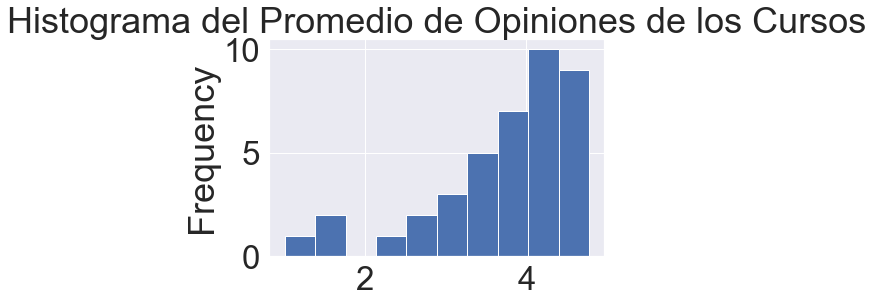

In [15]:
g_mean['Opinión General Sobre el Curso'].plot(kind='hist',bins=10,title='Histograma del Promedio de Opiniones de los Cursos');

## Opinion General Sobre el Curso

In [16]:
CUTLIST = [0,2,3,3.5,4.5,5]
LABELSLIST = ['r','orange','y','g', 'b']

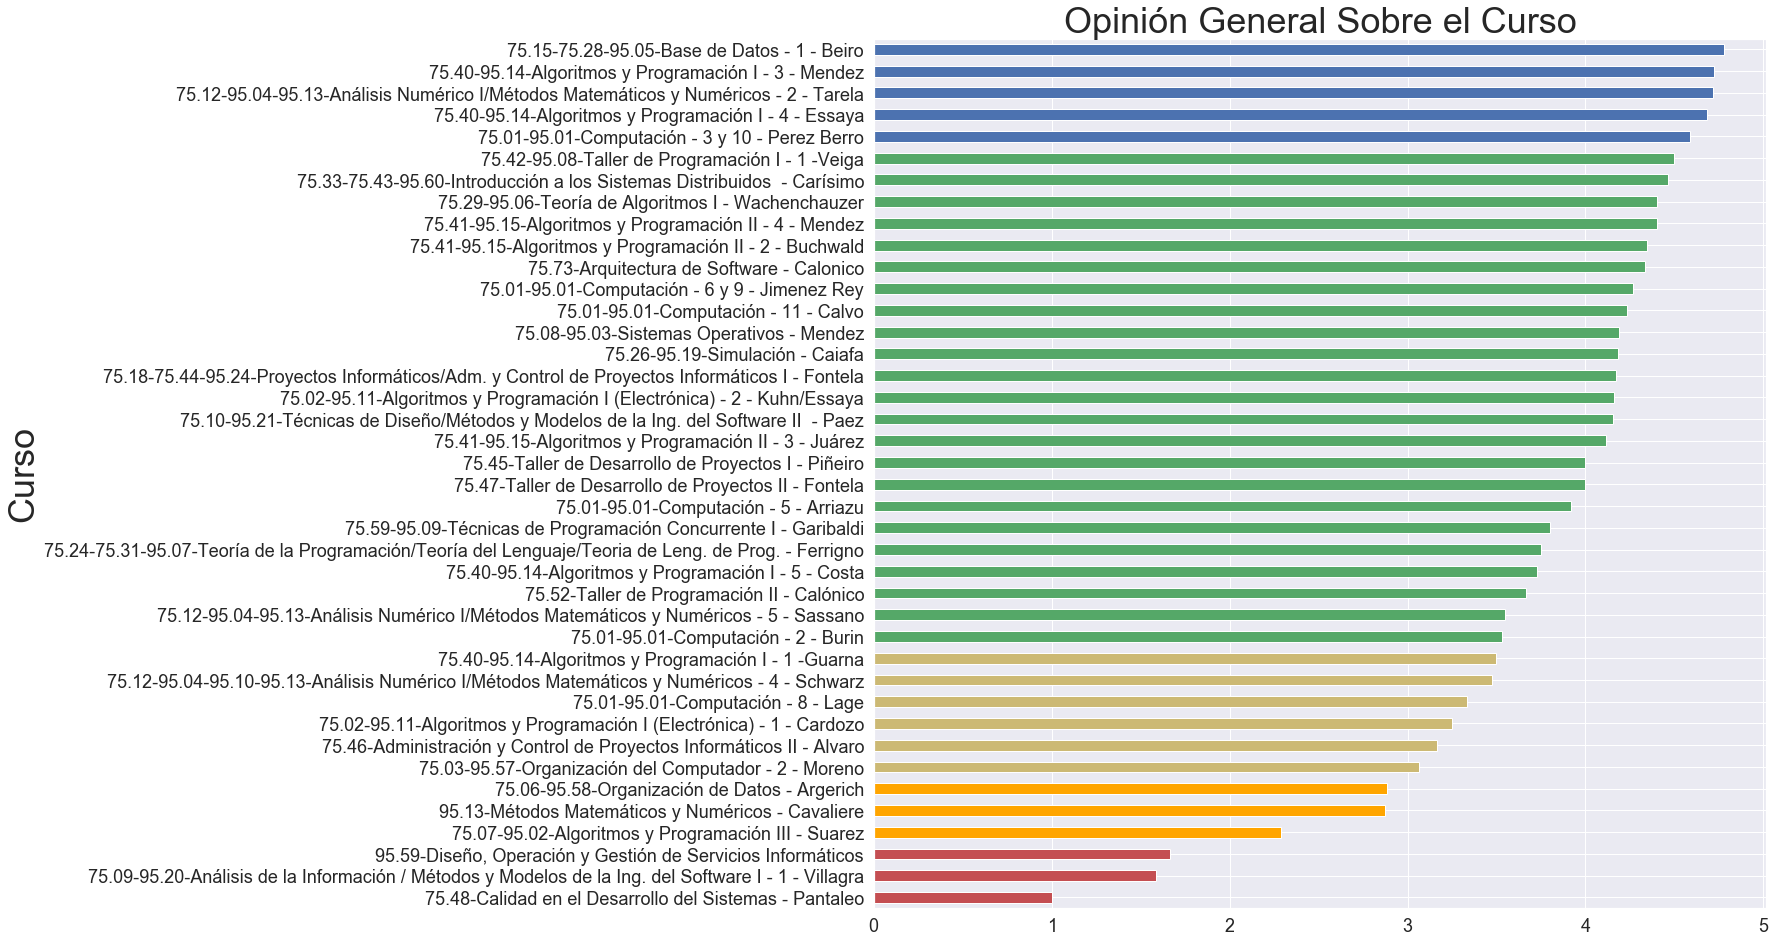

In [17]:
VARIABLE = 'Opinión General Sobre el Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas de la Materia son Interesantes?

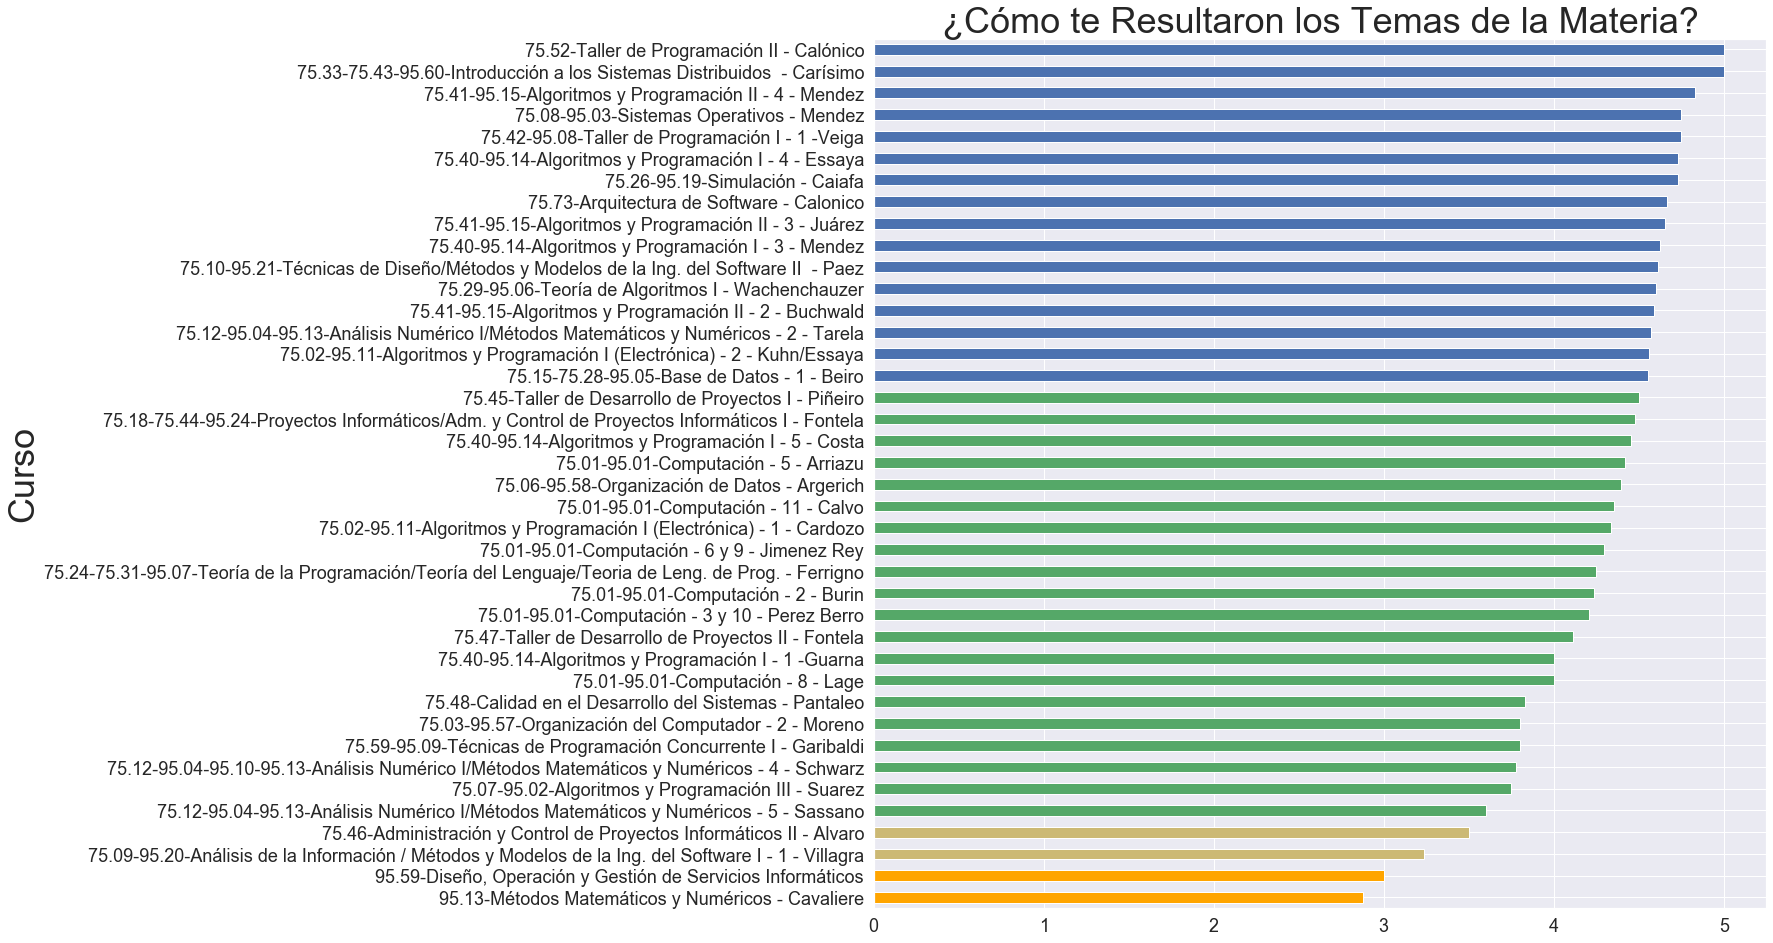

In [18]:
VARIABLE = '¿Cómo te Resultaron los Temas de la Materia?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors= pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas Están Actualizados?

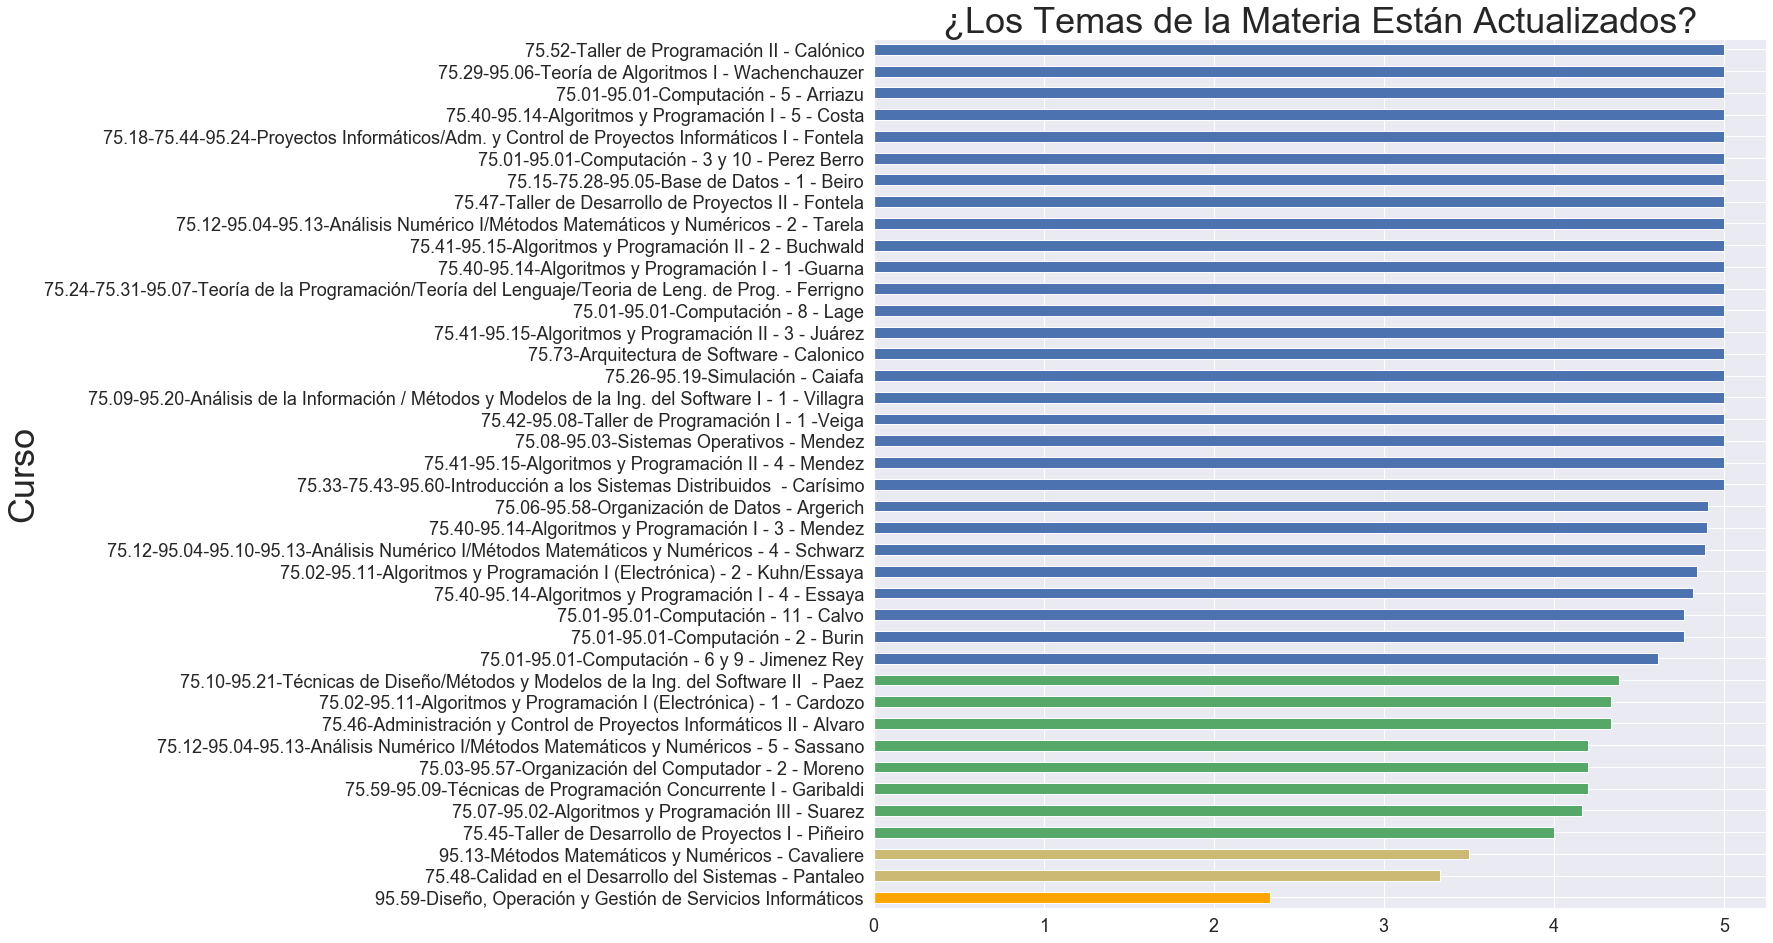

In [19]:
VARIABLE = '¿Los Temas de la Materia Están Actualizados?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Teóricas

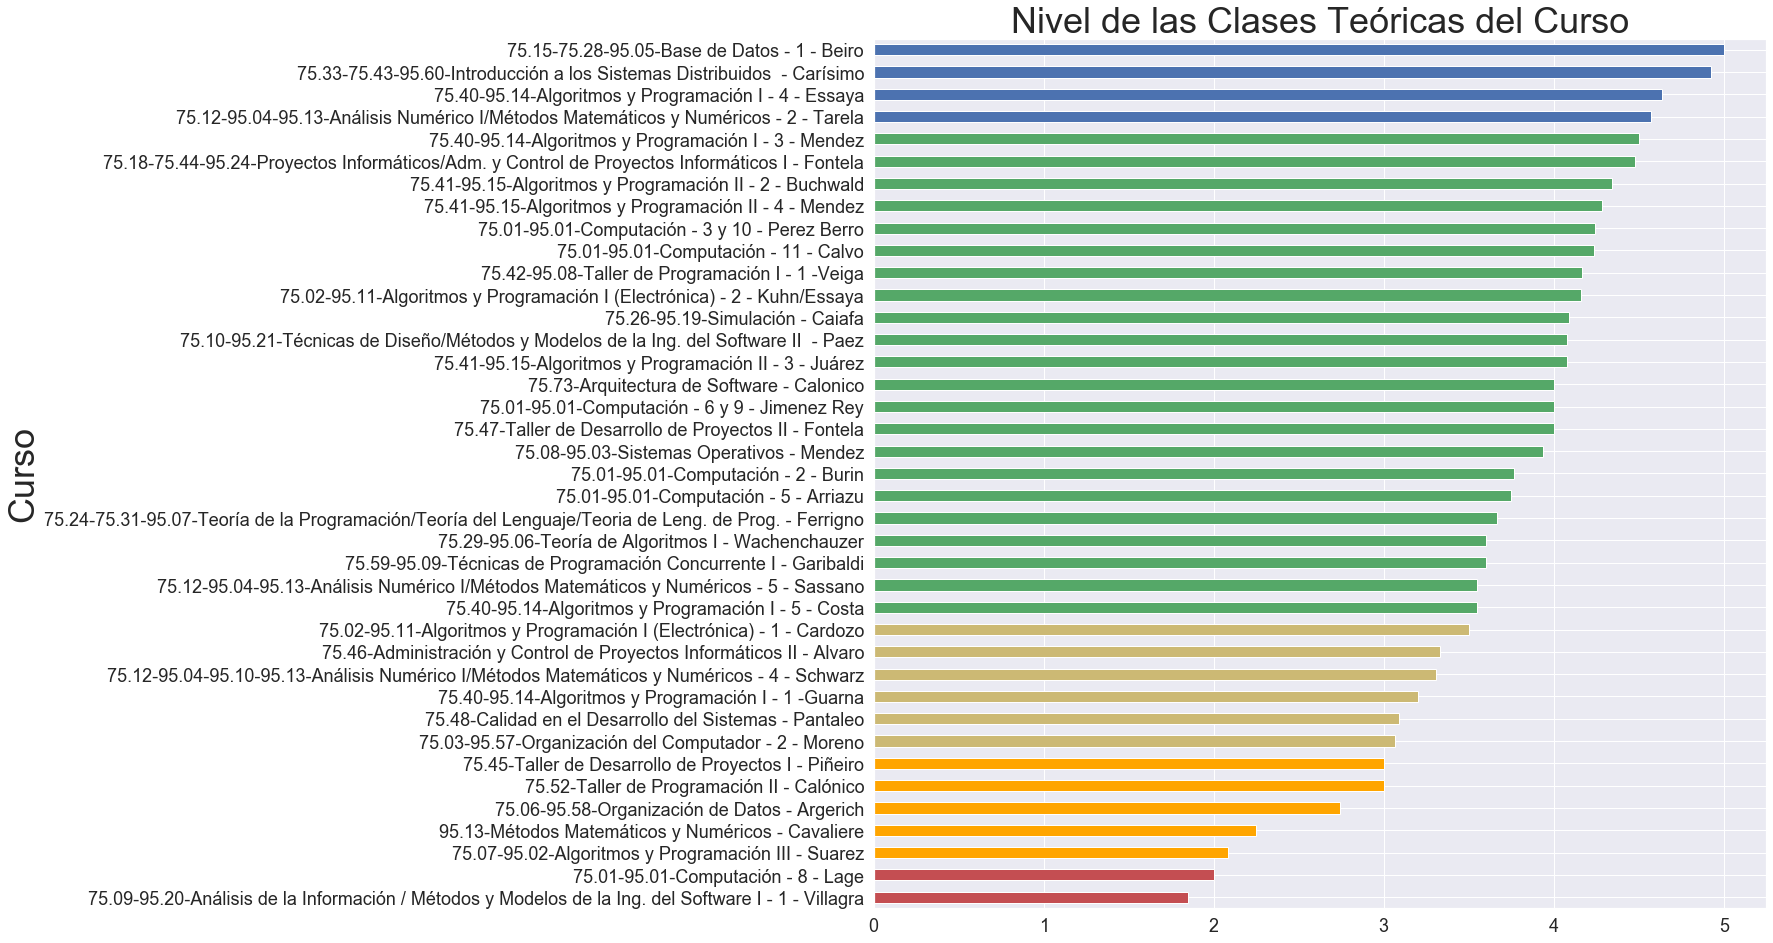

In [20]:
VARIABLE = 'Nivel de las Clases Teóricas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Prácticas del Curso

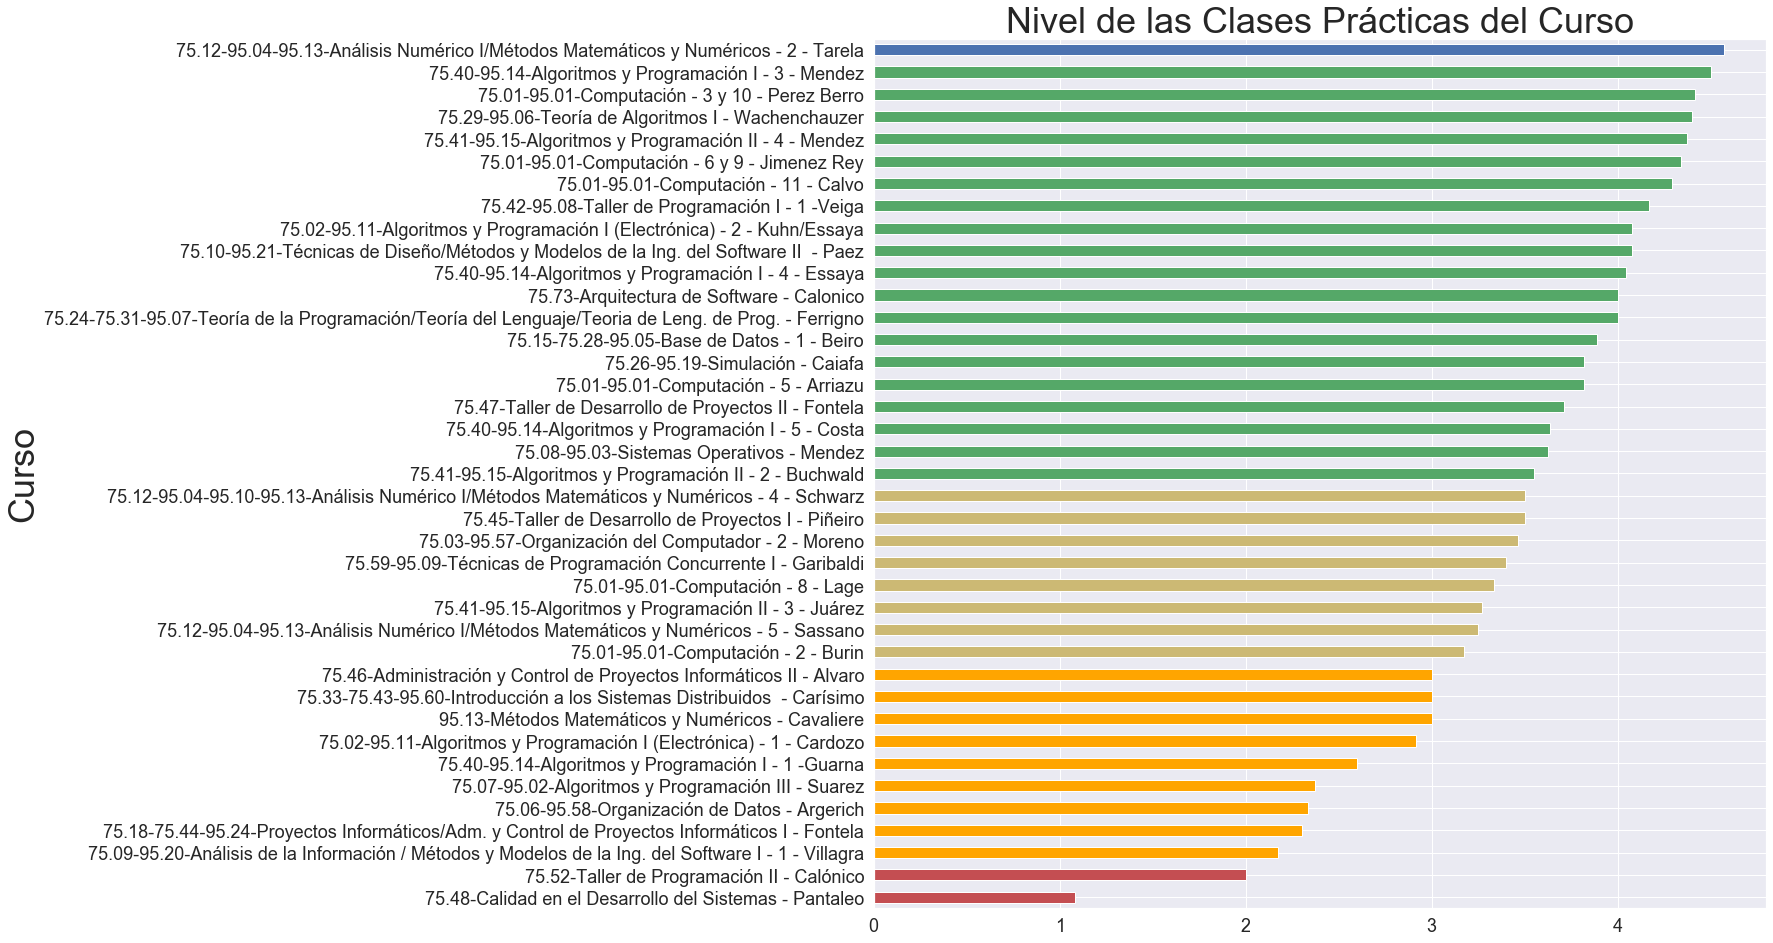

In [21]:
VARIABLE = 'Nivel de las Clases Prácticas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Nivel de las Clases (Promedio de Teóricas y Prácticas)

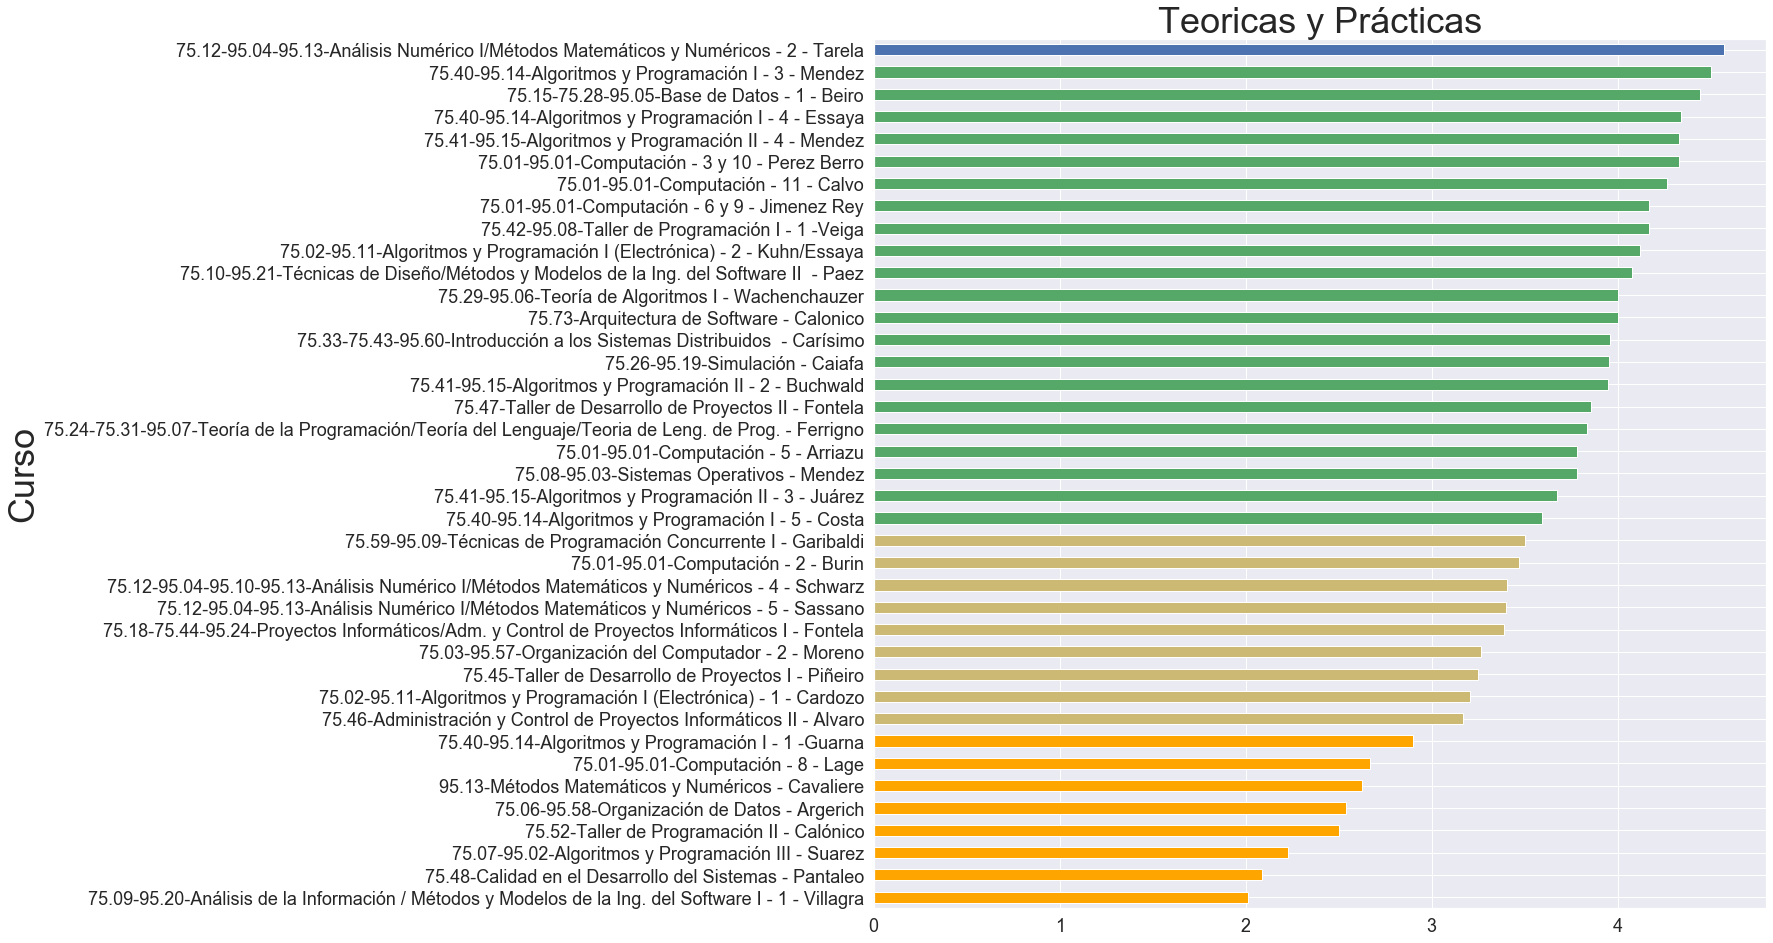

In [22]:
g_mean['Teoricas y Prácticas'] = (g_mean['Nivel de las Clases Prácticas del Curso'] + g_mean['Nivel de las Clases Teóricas del Curso'])/2
VARIABLE = 'Teoricas y Prácticas'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

In [23]:
g_mean.columns

Index(['Opinión General Sobre el Curso', '¿Aprobó la Cursada?',
       '¿Cómo te Resultaron los Temas de la Materia?',
       '¿Los Temas de la Materia Están Actualizados?',
       'Nivel de las Clases Teóricas del Curso',
       'Nivel de las Clases Prácticas del Curso', 'Dificultad del Curso',
       'Dificultad del TP', 'votes', 'Teoricas y Prácticas'],
      dtype='object')

# Dificultad del Curso

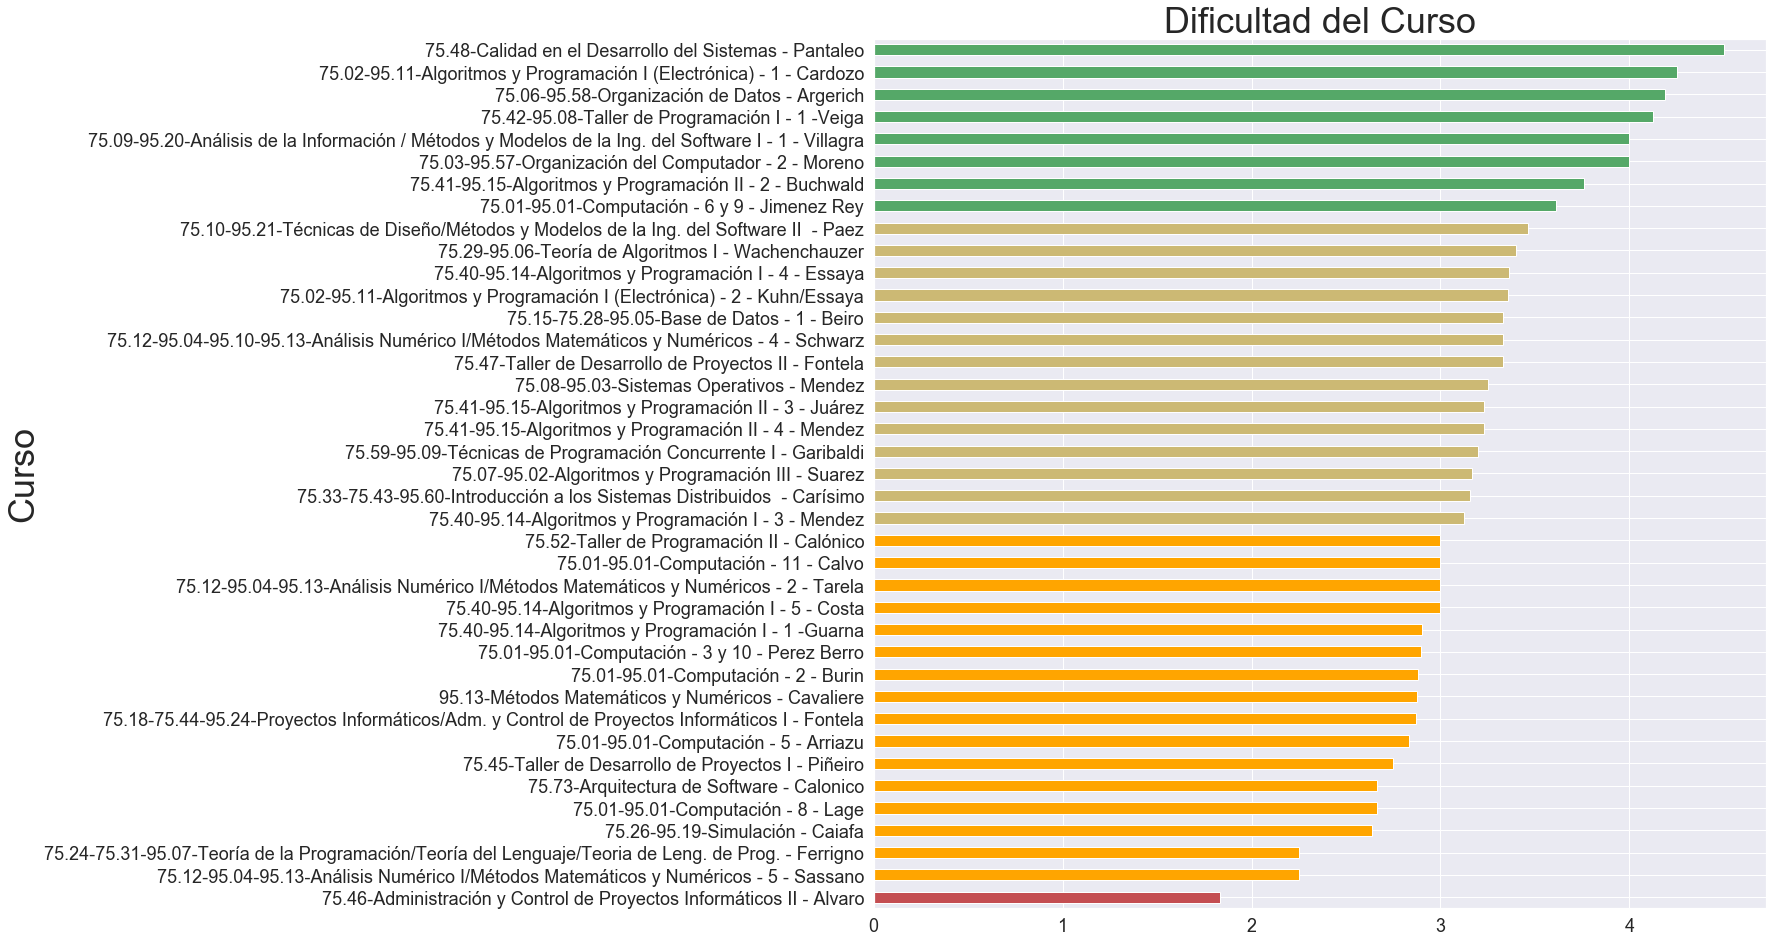

In [24]:
VARIABLE = 'Dificultad del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Relación entre Opinión Sobre el Curso y Dificultad

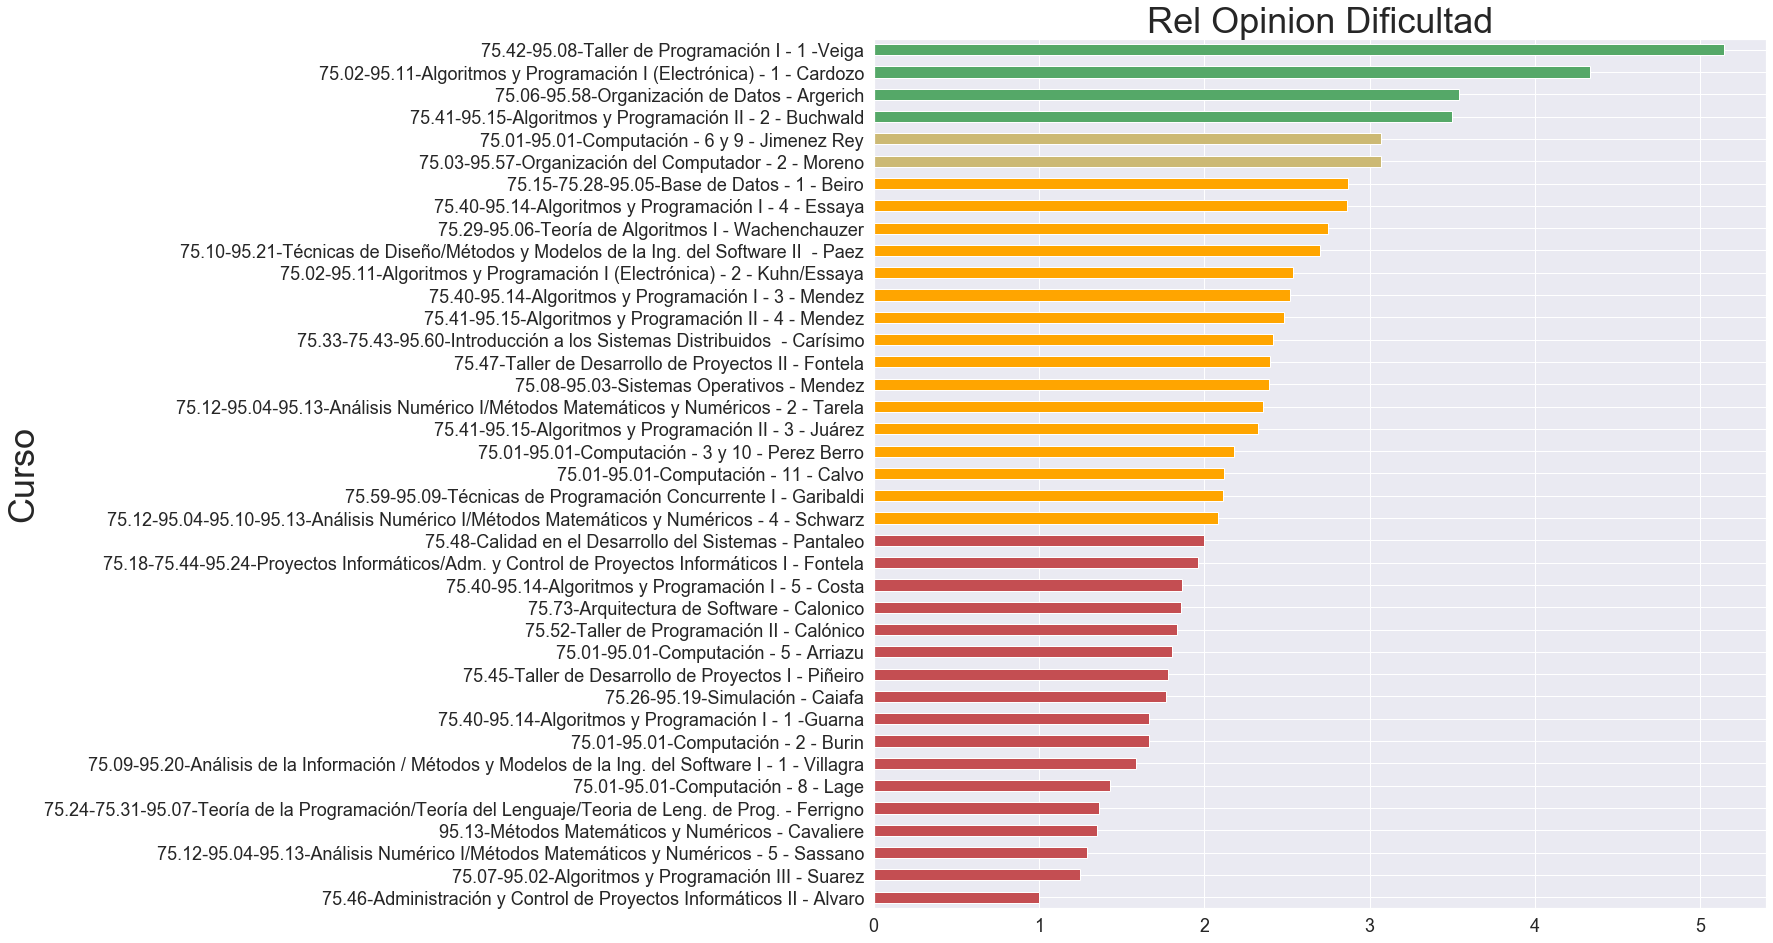

In [25]:
g_mean['Rel Opinion Dificultad'] = (g_mean['Opinión General Sobre el Curso']/(5-g_mean['Dificultad del Curso'])).sort_values()
VARIABLE = 'Rel Opinion Dificultad'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST).fillna('g')
g_mean[VARIABLE].plot(kind='barh',color = colors, figsize=(16,16),fontsize=18,title=VARIABLE);

## Correlacion Entre Variables

/Users/largerich/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


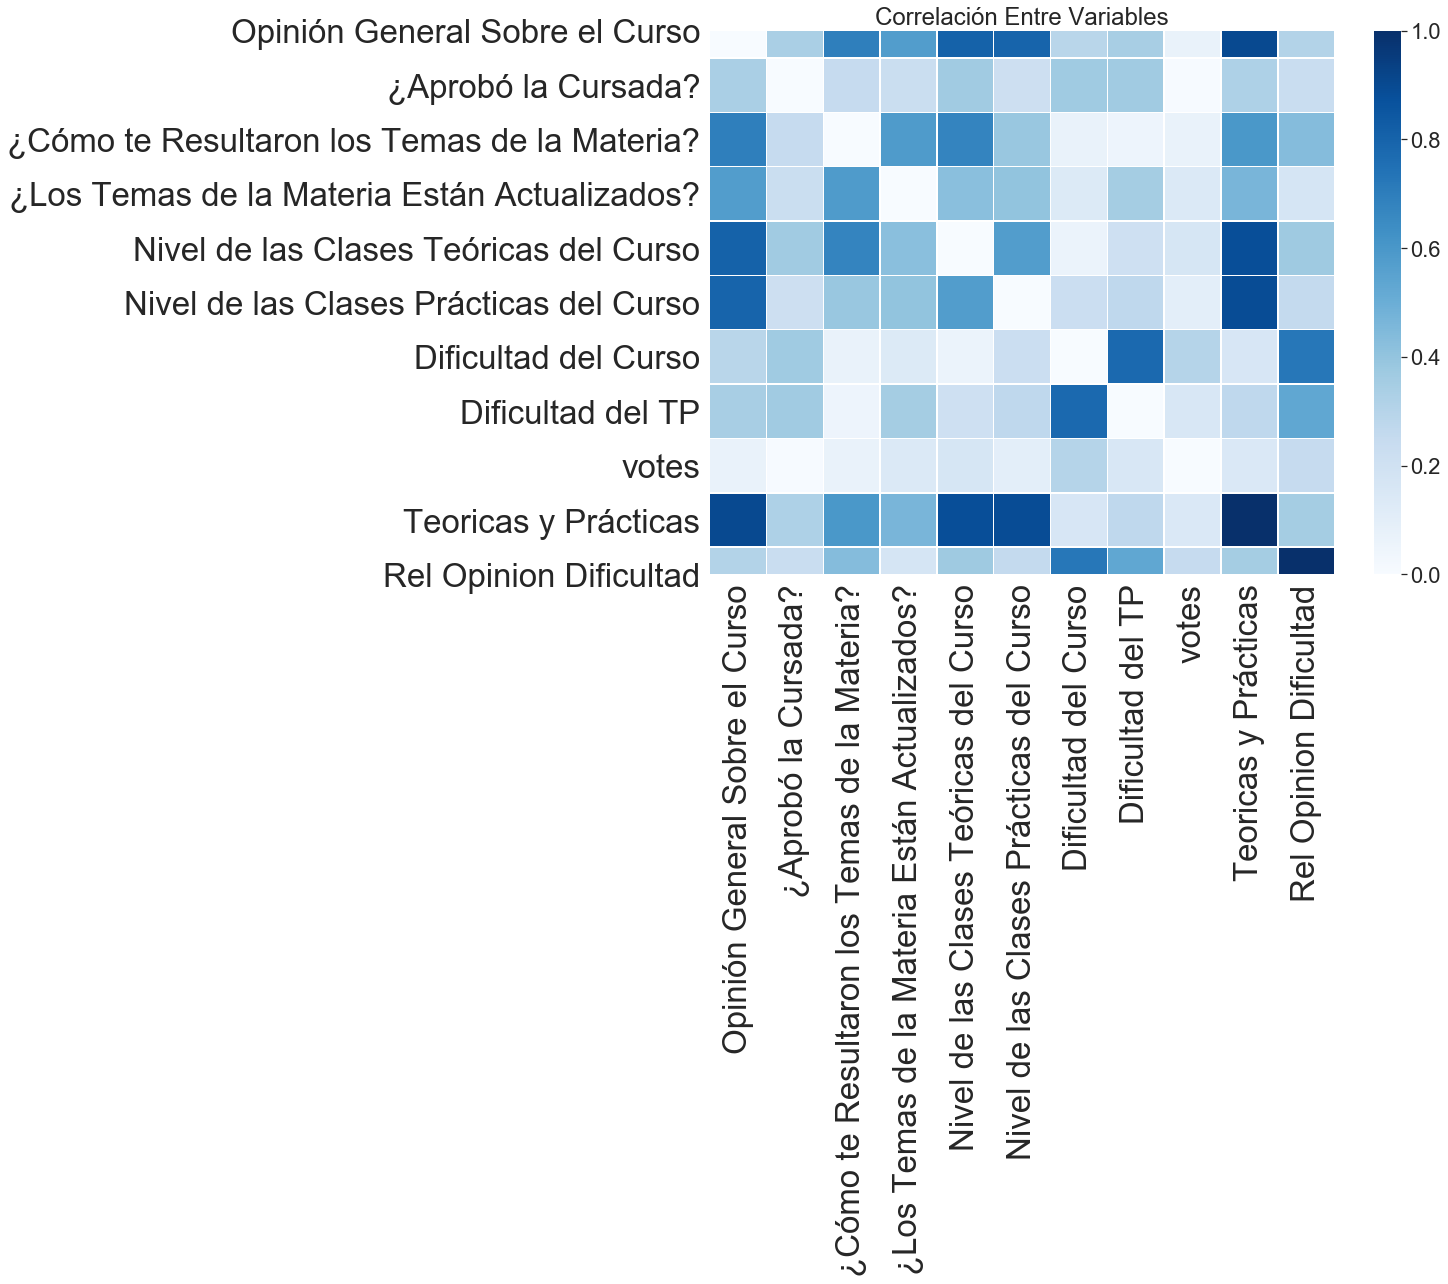

In [26]:
cor = g_mean.corr()
cor.values[[np.arange(9)]*2] = 0
cor.drop('votes',axis=1)
fig, ax = plt.subplots(figsize=(14,10))         # Sample f"igsize in inches
sns.set(font_scale=2)
sns.heatmap(cor.applymap(abs),annot=False, linewidths=.5,cmap='Blues',  ax=ax);
plt.title('Correlación Entre Variables');

## Diferencia Entre Nivel de Clases Teóricas y Prácticas
Hacia la derecha: Las clases teóricas son mejores que las prácticas.
Hacia la izquierda: Las clases prácticas son mejores que las teóricas.
En el centro: Poca o Ninguna diferencia.

In [27]:
g_mean['dif_teo_prac'] = ((g_mean['Nivel de las Clases Teóricas del Curso']-(g_mean['Nivel de las Clases Prácticas del Curso'])))

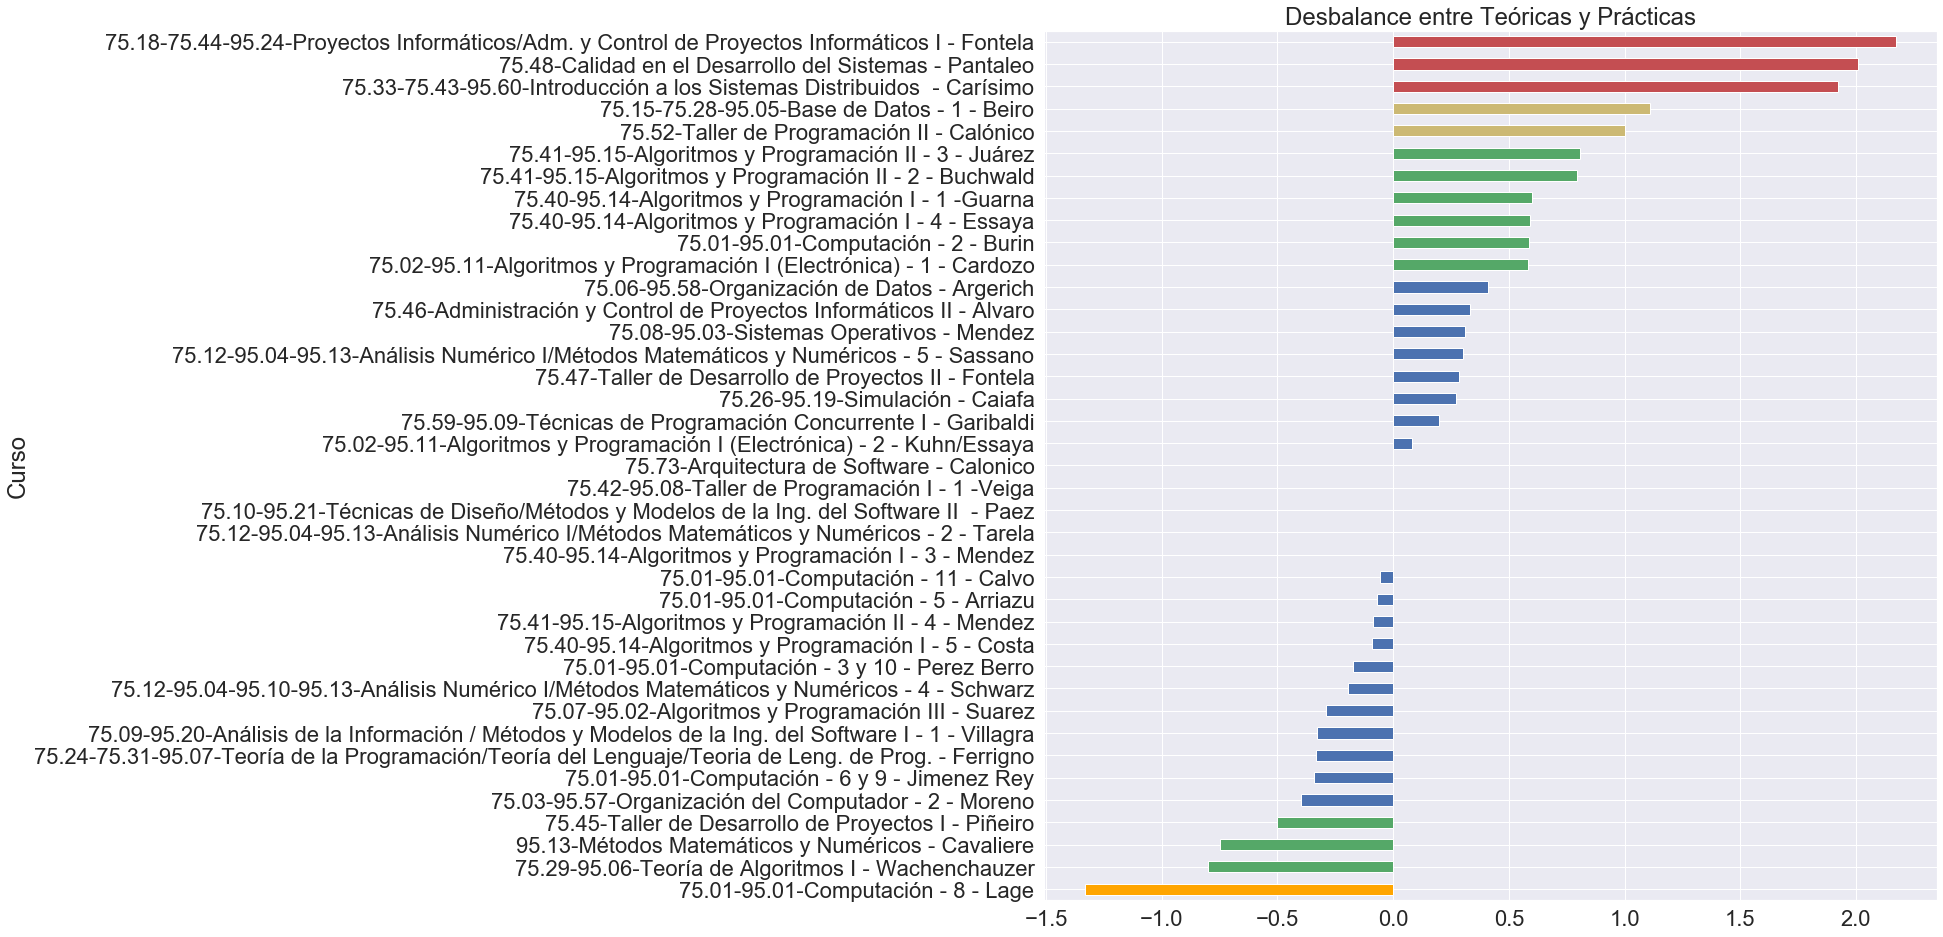

In [28]:
VARIABLE = 'dif_teo_prac'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(-abs(g_mean[VARIABLE]),5,labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title='Desbalance entre Teóricas y Prácticas');

## Promedio General por Curso

In [29]:
g_mean['general_ave'] = (g_mean['Opinión General Sobre el Curso']+g_mean['¿Cómo te Resultaron los Temas de la Materia?']+g_mean['¿Los Temas de la Materia Están Actualizados?']+g_mean['Nivel de las Clases Teóricas del Curso']+g_mean['Nivel de las Clases Prácticas del Curso']+g_mean['Dificultad del Curso'])/6

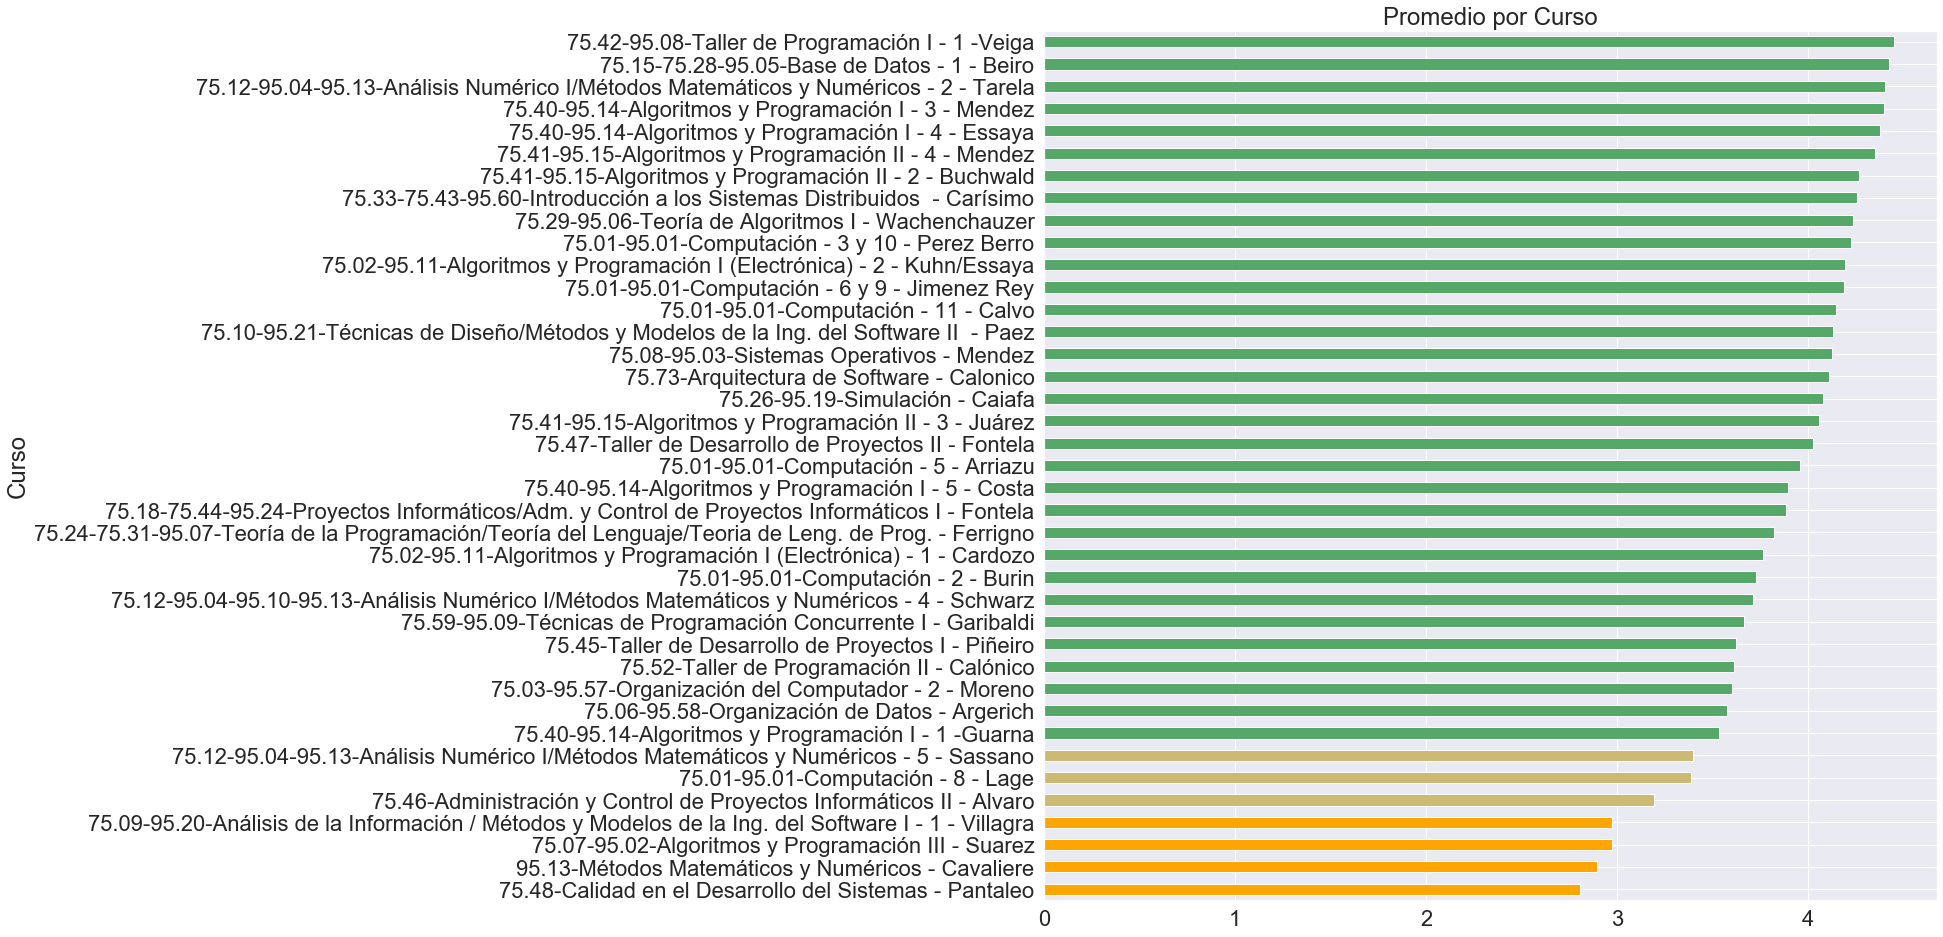

In [30]:
VARIABLE = 'general_ave'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title="Promedio por Curso");

# Comentarios por Curso

In [31]:
pd.set_option('max_colwidth',-1)
pd.set_option('max_r',999)
comp[['Curso','Comentarios Sobre el Curso']].sort_values(by = 'Curso').dropna()

Curso  \
0    75.01-95.01-Computación - 1 - Strobino                                                                
15   75.01-95.01-Computación - 11 - Calvo                                                                  
14   75.01-95.01-Computación - 11 - Calvo                                                                  
9    75.01-95.01-Computación - 11 - Calvo                                                                  
7    75.01-95.01-Computación - 11 - Calvo                                                                  
5    75.01-95.01-Computación - 11 - Calvo                                                                  
28   75.01-95.01-Computación - 2 - Burin                                                                   
29   75.01-95.01-Computación - 2 - Burin                                                                   
21   75.01-95.01-Computación - 2 - Burin                                                                   
55   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
56   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
57   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
61   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
60   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
62   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
63   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
51   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
49   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
35   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
37   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
39   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
41   75.01-95.01-Computación - 3 y 10 - Perez Berro                                                        
73   75.01-95.01-Computación - 5 - Arriazu                                                                 
75   75.01-95.01-Computación - 5 - Arriazu                                                                 
70   75.01-95.01-Computación - 5 - Arriazu                                                                 
72   75.01-95.01-Computación - 5 - Arriazu                                                                 
67   75.01-95.01-Computación - 5 - Arriazu                                                                 
66   75.01-95.01-Computación - 5 - Arriazu                                                                 
65   75.01-95.01-Computación - 5 - Arriazu                                                                 
69   75.01-95.01-Computación - 5 - Arriazu                                                                 
99   75.01-95.01-Computación - 6 y 9 - Jimenez Rey                                                         
101  75.01-95.01-Computación - 6 y 9 - Jimenez Rey                                                         
102  75.01-95.01-Computación - 6 y 9 - Jimenez Rey                                                         
103  75.01-95.01-Computación - 6 y 9 - Jimenez Rey                                                         
104  75.01-95.01-Computación - 6 y 9 - Jimenez Rey                                                         
105  75.01-95.01-Computación - 6 y 9 - Jimenez Rey                                                         
106  75.01-95.01-Computación - 6 y 9 - Jimenez Rey                                                     

In [32]:
comp.columns

Index(['Marca temporal', 'Email (opcional)', 'Curso',
       'Opinión General Sobre el Curso', '¿Aprobó la Cursada?',
       '¿Cómo te Resultaron los Temas de la Materia?',
       '¿Los Temas de la Materia Están Actualizados?',
       'Nivel de las Clases Teóricas del Curso',
       'Nivel de las Clases Prácticas del Curso', 'Dificultad del Curso',
       'Dificultad del TP', 'Comentarios Sobre el Curso',
       '¿El email puede ser mostrado al docente?'],
      dtype='object')

In [33]:
comp['¿Aprobó la Cursada?'] = (comp['¿Aprobó la Cursada?'] == 5)

In [34]:
comp['¿Los Temas de la Materia Están Actualizados?'] = (comp['¿Los Temas de la Materia Están Actualizados?'] == 5)

In [35]:
lista_cursos = list(comp.groupby('Curso').size().sort_values(ascending=False).keys())

# Resultados curso por curso

In [36]:
# Por curso

for curso in lista_cursos:
    chunk = comp[comp['Curso'] == curso]
    print(curso)
    print("Num votes:",len(chunk))
    print("Opinion General:",round(chunk['Opinión General Sobre el Curso'].mean(),2))
    print("Nivel de las Clases Teóricas del Curso:",round(chunk['Nivel de las Clases Teóricas del Curso'].mean(),2))
    print("Nivel de las Clases Prácticas del Curso:",round(chunk['Nivel de las Clases Prácticas del Curso'].mean(),2))
    print("Dificultad del Curso:",round(chunk['Dificultad del Curso'].mean(),2))
    print("Dificultad del TP:",round(chunk['Dificultad del TP'].mean(),2))
    print("¿Cómo te Resultaron los Temas de la Materia?:",round(chunk['¿Cómo te Resultaron los Temas de la Materia?'].mean(),2))
    print("¿Los Temas de la Materia Están Actualizados?:",round(chunk['¿Los Temas de la Materia Están Actualizados?'].mean(),2))    
    print("Aprobo la cursada:",round(chunk['¿Aprobó la Cursada?'].mean(),2))
    print("----------------------")

75.06-95.58-Organización de Datos - Argerich
Num votes: 43
Opinion General: 2.88
Nivel de las Clases Teóricas del Curso: 2.74
Nivel de las Clases Prácticas del Curso: 2.33
Dificultad del Curso: 4.19
Dificultad del TP: 3.56
¿Cómo te Resultaron los Temas de la Materia?: 4.4
¿Los Temas de la Materia Están Actualizados?: 0.98
Aprobo la cursada: 0.91
----------------------
75.01-95.01-Computación - 6 y 9 - Jimenez Rey
Num votes: 41
Opinion General: 4.27
Nivel de las Clases Teóricas del Curso: 4.0
Nivel de las Clases Prácticas del Curso: 4.34
Dificultad del Curso: 3.61
Dificultad del TP: 3.73
¿Cómo te Resultaron los Temas de la Materia?: 4.29
¿Los Temas de la Materia Están Actualizados?: 0.9
Aprobo la cursada: 0.9
----------------------
75.40-95.14-Algoritmos y Programación I - 3 - Mendez
Num votes: 40
Opinion General: 4.72
Nivel de las Clases Teóricas del Curso: 4.5
Nivel de las Clases Prácticas del Curso: 4.5
Dificultad del Curso: 3.12
Dificultad del TP: 3.58
¿Cómo te Resultaron los Temas 

# Analisis Historico

In [37]:
comp_1 = pd.read_csv('encuesta.csv')
comp_1 = map_answers(comp_1)
comp_2 = pd.read_csv('encuesta2.csv')
comp_2 = map_answers(comp_2)
comp_3 = pd.read_csv('encuesta3.csv')
comp_3 = map_answers(comp_3)
comp_4 = pd.read_csv('encuesta4.csv')
comp_4 = map_answers(comp_4)
comp_5 = pd.read_csv('encuesta5.csv')
comp_5 = map_answers(comp_5)
comp_1['cuatrimestre'] = 1
comp_2['cuatrimestre'] = 2
comp_3['cuatrimestre'] = 3
comp_4['cuatrimestre'] = 4
comp_5['cuatrimestre'] = 5

In [38]:
print(len(comp_1))
print(len(comp_2))
print(len(comp_3))
print(len(comp_4))
print(len(comp_5))

666
528
701
834
844


In [39]:
comp = comp_1.append(comp_2)
comp = comp.append(comp_3)
comp = comp.append(comp_4)
comp = comp.append(comp_5)

/Users/largerich/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [40]:
grouped = comp.groupby('cuatrimestre').mean()

In [41]:
grouped.head()

Dificultad del TP  Nivel de las Clases Prácticas del Curso  \
cuatrimestre                                                               
1             3.519878           3.503876                                  
2             3.473684           3.496094                                  
3             3.355072           3.514749                                  
4             3.434258           3.595771                                  
5             3.474435           3.445693                                  

              Nivel de las Clases Teóricas del Curso  \
cuatrimestre                                           
1             3.749226                                 
2             3.523810                                 
3             3.451183                                 
4             3.599004                                 
5             3.453106                                 

              Opinión General Sobre el Curso  ¿Aprobó la Cursada?  \
cuatrimestre                                                        
1             3.789790                        4.717718              
2             3.729167                        4.613636              
3             3.691869                        4.669044              
4             3.805755                        4.683453              
5             3.631517                        4.606635              

              ¿Cómo te Resultaron los Temas de la Materia?  \
cuatrimestre                                                 
1             4.282282                                       
2             4.164773                                       
3             4.097004                                       
4             4.220624                                       
5             4.135071                                       

              ¿Los Temas de la Materia Están Actualizados?  
cuatrimestre                                                
1             4.723724                                      
2             4.522727                                      
3             4.457917                                      
4             4.664269                                      
5             4.649289

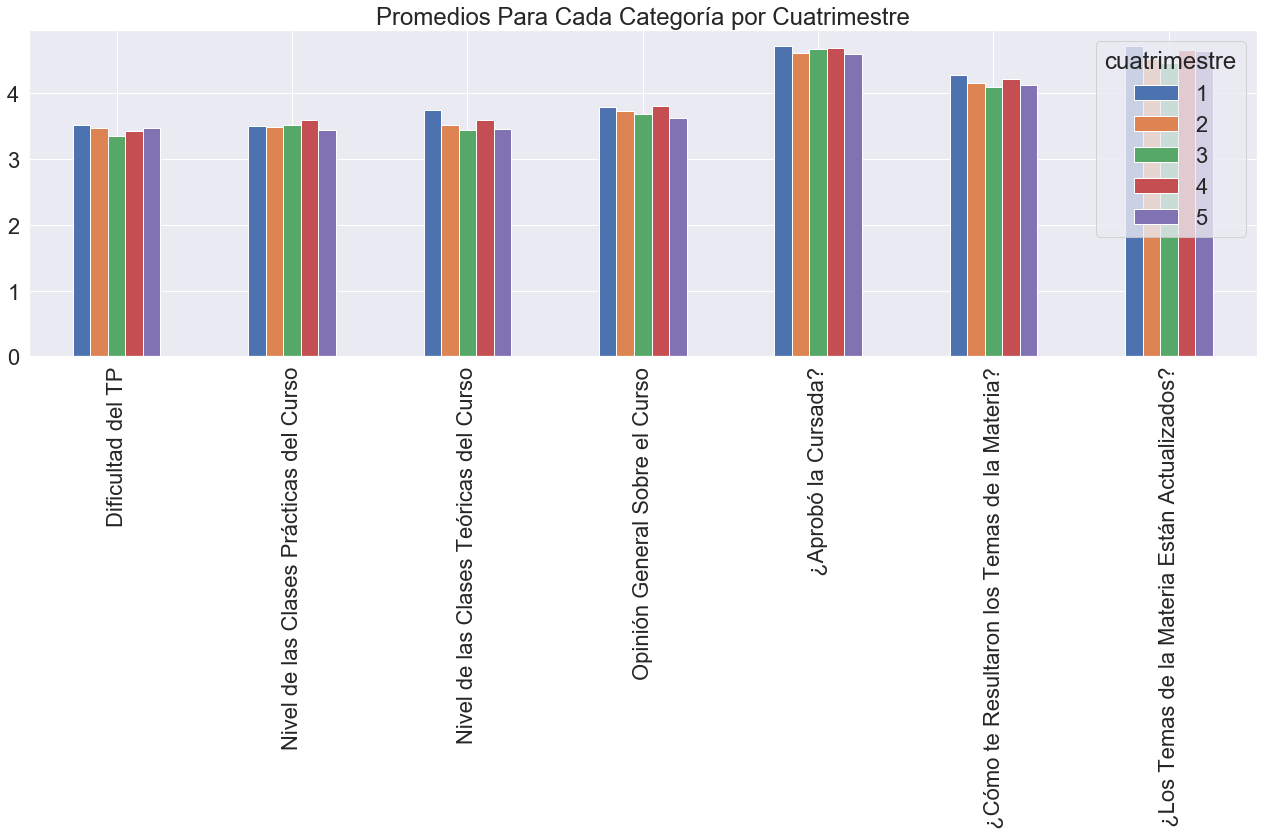

In [42]:
grouped.T.plot.bar(figsize=(22,6));
plt.title('Promedios Para Cada Categoría por Cuatrimestre');

In [43]:
lista_cursos = list(comp.groupby('Curso')['cuatrimestre'].count().sort_values(ascending = False)[0:20].index)

In [44]:
all_means = comp[comp['Curso'].isin(lista_cursos)].groupby(['Curso','cuatrimestre']).mean()

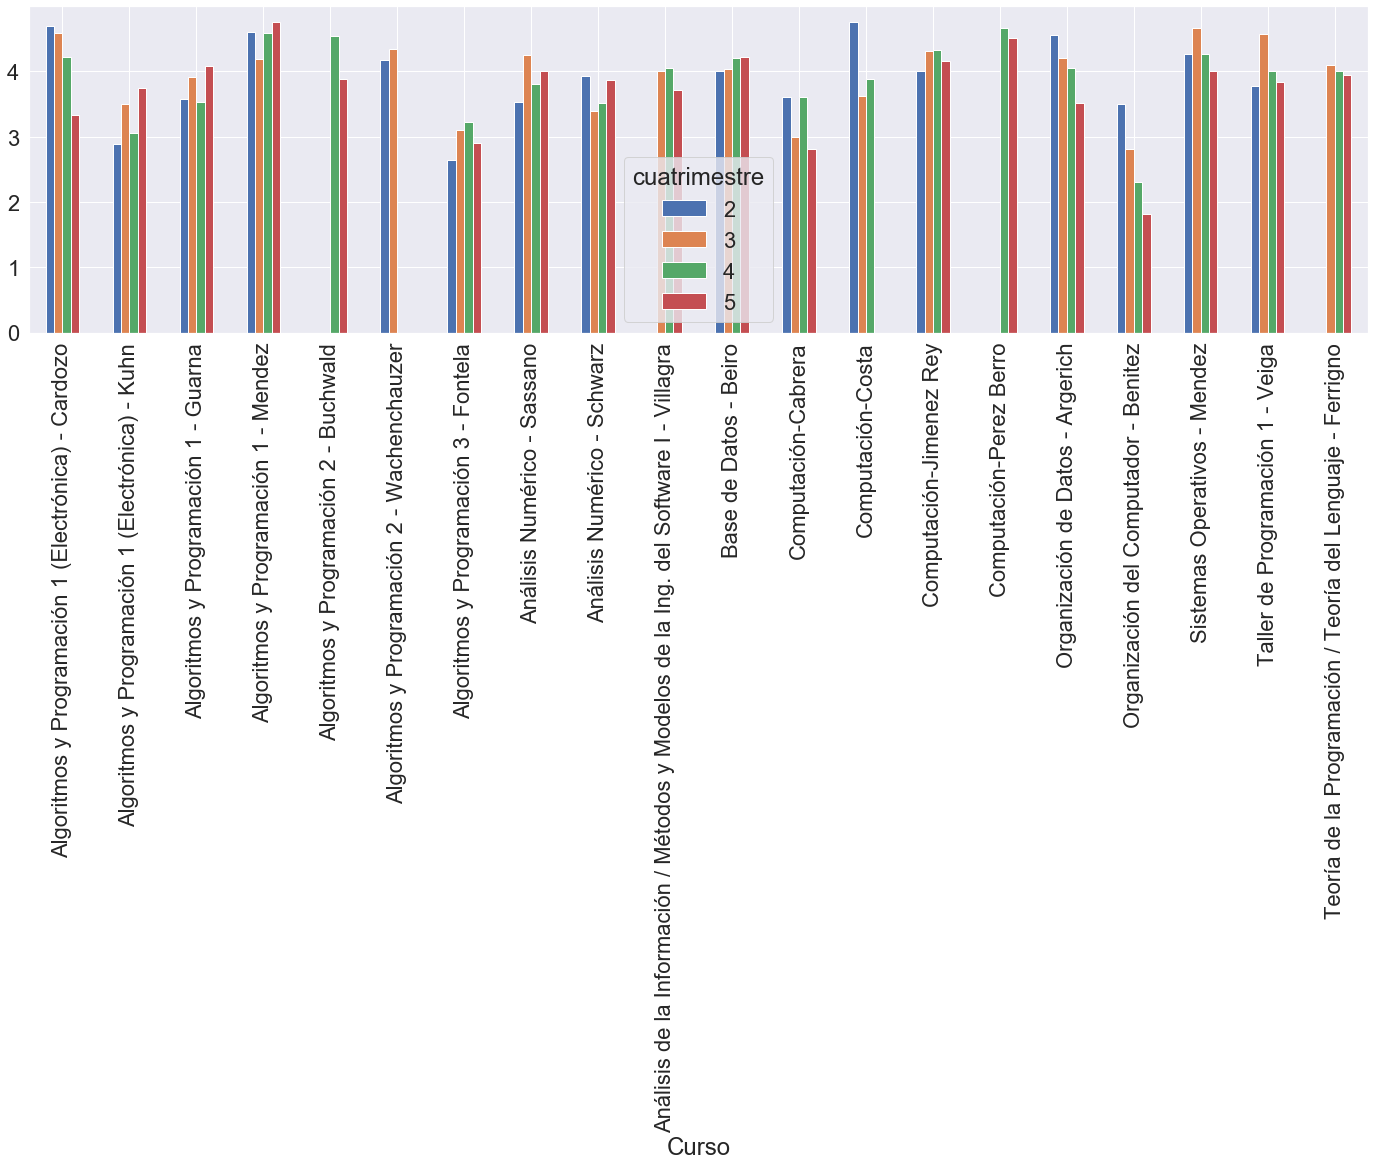

In [45]:
all_means['Opinión General Sobre el Curso'].unstack().plot.bar(figsize=(24,6));

In [46]:
lista_cursos = list(comp.groupby('Curso')['cuatrimestre'].count().sort_values(ascending = False)[21:40].index)

In [47]:
all_means = comp[comp['Curso'].isin(lista_cursos)].groupby(['Curso','cuatrimestre']).mean()

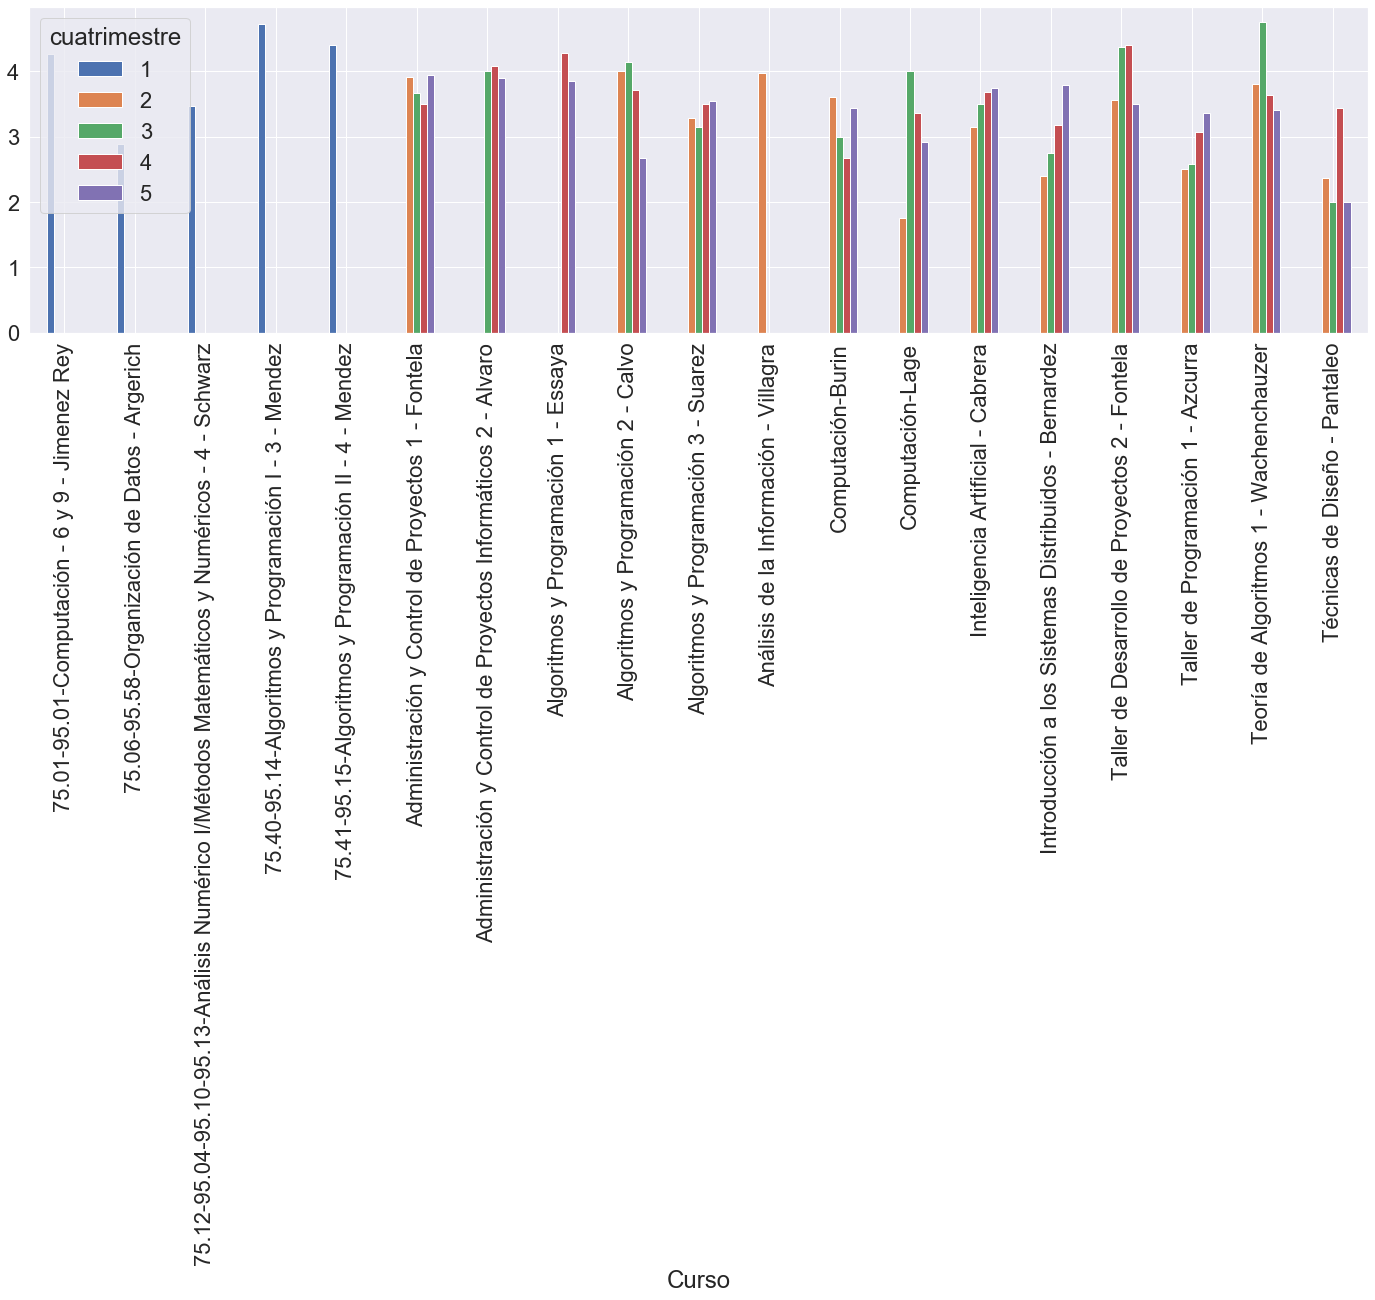

In [48]:
all_means['Opinión General Sobre el Curso'].unstack().plot.bar(figsize=(24,6));

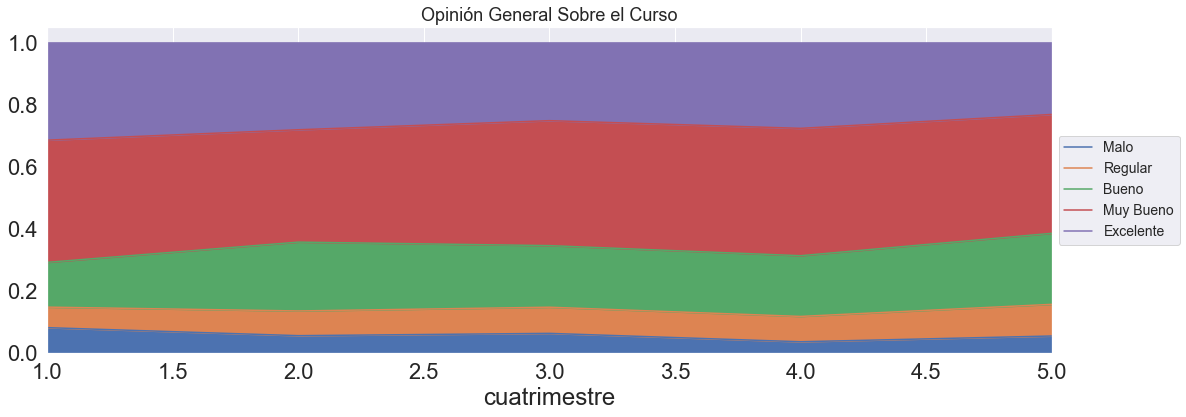

In [49]:
VARIABLE = 'Opinión General Sobre el Curso'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['Malo','Regular','Bueno','Muy Bueno','Excelente'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

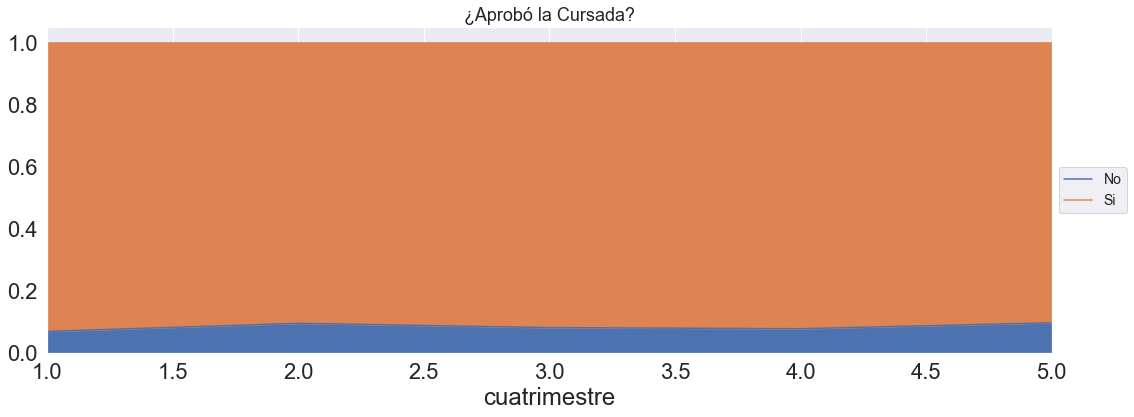

In [50]:
VARIABLE = '¿Aprobó la Cursada?'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['No','Si'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

cuatrimestre                                         1         2         3  \
¿Los Temas de la Materia Están Actualizados?                                 
1                                             0.069069  0.119318  0.135521   
5                                             0.930931  0.880682  0.864479   

cuatrimestre                                         4         5  
¿Los Temas de la Materia Están Actualizados?                      
1                                             0.083933  0.087678  
5                                             0.916067  0.912322  


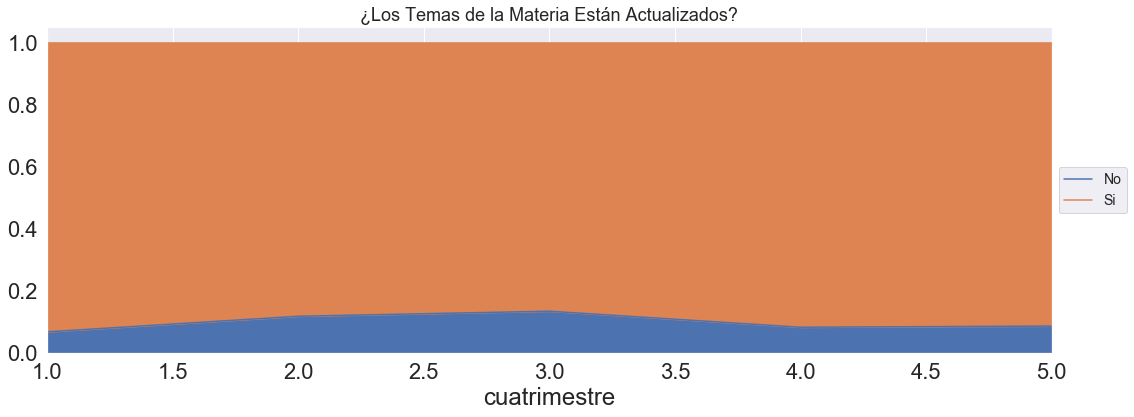

In [51]:
VARIABLE = '¿Los Temas de la Materia Están Actualizados?'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
print(area1)
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['No','Si'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

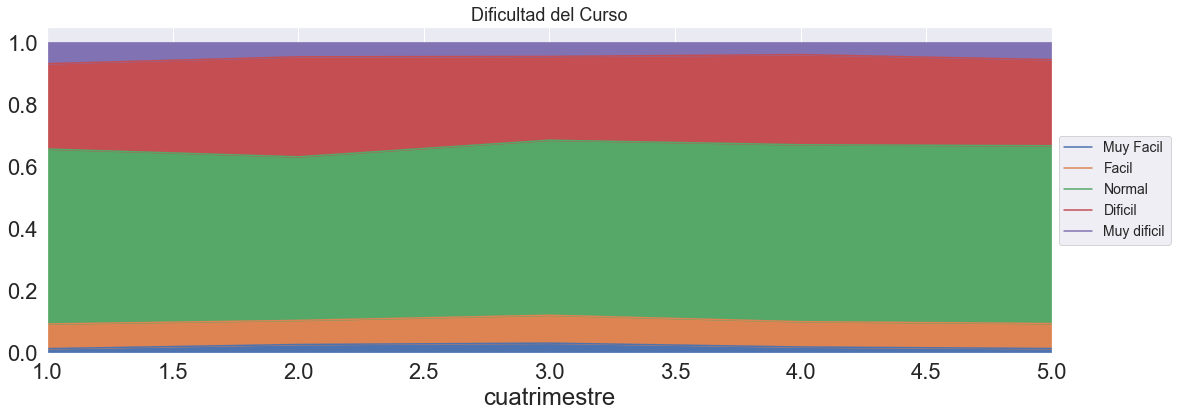

In [52]:
VARIABLE = 'Dificultad del Curso'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['Muy Facil','Facil','Normal','Dificil','Muy dificil'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);